In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
daily_data = pd.read_csv('dataset/hn_daily.csv')

daily_data['datetime'] = pd.to_datetime(daily_data['datetime'])
daily_data.set_index('datetime', inplace=True)

daily_data = daily_data.sort_index(ascending=True)

### 🌦️ Weather Features Table

| feature | meaning | values | formula |
|:--|:--|:--|:--|
| tempmax | Maximum daily temperature | °C | Max(temp) |
| tempmin | Minimum daily temperature | °C | Min(temp) |
| temp | Average daily temperature | °C | (tempmax + tempmin) / 2 |
| feelslikemax | Maximum daily feels-like temperature | °C | Calculated using Heat Index (combination of temperature and humidity) |
| feelslikemin | Minimum daily feels-like temperature | °C | Calculated using Wind Chill (combination of temperature and wind speed) |
| feelslike | Average daily feels-like temperature | °C | Heat Index (hot and humid) or Wind Chill (cold, windy) |
| dew | The dew point is the temperature at which air must be cooled to become saturated with moisture and start forming dew | °C |  |
| humidity | Daily values of humidity are the mean of the hourly values (average humidity) | 0–100 (%) | Daily values of humidity are the mean of the hourly values |
| precip | Daily precipitation amount | mm | Sum of hourly precipitation values measured in the day |
| precipprob | Probability of precipitation | 0–100 (%) | Forecasted probability of precipitation |
| precipcover | Percentage of time with precipitation in the day | 0–100 (%) | (Number of hours with precipitation / 24) × 100 |
| preciptype | Type of precipitation | rain, snow, ice, freezing rain |  |
| snow | The amount of new snow that has fallen in the time period | cm |  |
| snowdepth | The average amount of snow currently on the ground for the time period | cm |  |
| windgust | The maximum wind speed measured over a short period of time (typically less than 20 seconds) | km/h or mph | Max(wind speed) |
| windspeed | Average wind speed | km/h | Average wind speed during the day |
| winddir | Wind direction | 0–360° (0 degrees = North, 90 = East, 180 = South, 270 = West, back to 360 = North) |  |
| sealevelpressure | The atmospheric pressure at sea level (removes reduction in pressure due to altitude). Also called Sea Level Pressure | mb | Daily values of sea level pressure are the mean of the hourly values |
| cloudcover | The amount of sky that is covered by cloud (cloud cover) | 0–100 (%) | Daily values include the mean of the hourly cloud coverage values |
| visibility | The distance that can be seen in daylight (visibility) | km | Daily values are created from the mean of the hourly values |
| solarradiation | Solar radiation | W/m² | Daily values of solar radiation are the mean of the hourly values |
| solarenergy | Solar energy during the day | MJ/m² | Daily values of solar energy are the sum of the hourly values |
| uvindex | UV index | 0–10 | The UV index is calculated based on short-wave solar radiation, cloudiness, cloud type, time of day, time of year, and altitude. Daily values represent the maximum of hourly values |
| severerisk | The risk of convective storms such as thunderstorms, hail, and tornadoes | 0–100 | Low Risk: Values less than 30 indicate a low likelihood of severe weather events; Moderate Risk: Values between 30 and 70 suggest a moderate probability of severe weather activity; High Risk: Values above 70 denote a high potential for severe weather, requiring caution and preparedness |
| sunrise | Sunrise time | HH:MM:SS |  |
| sunset | Sunset time | HH:MM:SS |  |
| moonphase | Moon phase | 0–1 | 0 – new moon, 0–0.25 – waxing crescent, 0.25 – first quarter, 0.25–0.5 – waxing gibbous, 0.5 – full moon, 0.5–0.75 – waning gibbous, 0.75 – last quarter, 0.75–1 – waning crescent |
| conditions | Notable weather conditions reported at a particular location (general weather conditions) | thunderstorms, rainfall, etc. |  |
| description | Description of the weather for the day | Text description from API |  |
| icon | A weather icon | clear-day, clear-night, rain, snow, etc. |  |
| stations | Weather station code | VVNB |  |
| source | Data source | obs |  |
| name | Station or geographical location name of where the data was recorded | Hanoi |  |



### Data Overview

In [59]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3927 entries, 2015-01-01 to 2025-10-01
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3927 non-null   object 
 1   tempmax           3927 non-null   float64
 2   tempmin           3927 non-null   float64
 3   temp              3927 non-null   float64
 4   feelslikemax      3927 non-null   float64
 5   feelslikemin      3927 non-null   float64
 6   feelslike         3927 non-null   float64
 7   dew               3927 non-null   float64
 8   humidity          3927 non-null   float64
 9   precip            3927 non-null   float64
 10  precipprob        3927 non-null   int64  
 11  precipcover       3927 non-null   float64
 12  preciptype        2885 non-null   object 
 13  snow              3927 non-null   int64  
 14  snowdepth         3927 non-null   int64  
 15  windgust          3927 non-null   float64
 16  windspeed         3927 n

**Mostly Complete Data:** 

Most of your columns have 3927 non-null entries, which is great! It means there's very little missing information for things like temperature, humidity, and wind speed.

**Identified Missing Values:**

The columns `preciptype` and `severerisk` have a significant number of missing values. 

**Variety of Data Types:** 

The dataset have a good mix of numerical data (float64, int64) that we can use for calculations and categorical data (object) that we can use for grouping and classification. 

In [60]:
daily_data.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,3927.000000,3927.000000,...,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,1361.000000,3927.000000
mean,28.515152,21.934963,24.898370,32.620550,22.703107,27.397021,20.488541,78.27344,5.226019,72.167049,...,17.394423,126.961268,1011.085358,63.828928,8.605602,155.118386,13.388719,5.84441,28.518736,0.483990
std,5.842098,4.870462,5.139137,9.530943,6.075115,7.734238,5.783574,10.76699,15.895322,44.823360,...,4.999515,97.746225,7.142712,23.636997,1.756703,77.239502,6.676342,2.47802,24.089535,0.288759
min,8.000000,5.900000,7.000000,8.000000,2.100000,4.600000,-2.000000,31.00000,0.000000,0.000000,...,6.500000,0.000000,991.100000,0.000000,2.400000,0.000000,0.000000,0.00000,5.000000,0.000000
25%,24.100000,18.000000,21.000000,24.100000,18.000000,21.000000,16.850000,72.20000,0.000000,0.000000,...,13.900000,61.900000,1005.200000,49.350000,7.700000,91.100000,7.800000,4.00000,10.000000,0.250000
50%,29.500000,23.000000,26.100000,32.700000,23.000000,27.100000,22.500000,79.80000,0.267000,100.000000,...,16.600000,109.300000,1010.700000,67.300000,9.000000,154.100000,13.300000,6.00000,10.000000,0.500000
75%,33.000000,26.000000,29.000000,41.300000,26.000000,33.900000,25.200000,85.80000,2.595000,100.000000,...,20.500000,131.900000,1016.500000,82.300000,9.800000,216.600000,18.700000,8.00000,60.000000,0.750000
max,41.900000,31.000000,35.500000,52.500000,40.400000,46.200000,28.500000,100.00000,333.117000,100.000000,...,53.600000,359.800000,1037.200000,100.000000,12.600000,323.500000,27.900000,10.00000,100.000000,0.980000


The table above gives statistical measures for all numerical features in the dataset. Here's what we can learn:

**Temperature Characteristics**

- **Average Temperature (`temp`)**: Mean of 24.9°C with a standard deviation of 5.1°C
  - Range: 7°C (extreme winter cold) to 35.5°C (extreme summer heat)
  - 50% of days fall between 21°C and 29°C (interquartile range)
  - This confirms Hanoi's humid subtropical climate with distinct seasons

- **Feels-Like Temperature (`feelslike`)**: Mean of 27.4°C, noticeably higher than actual temperature
  - Can reach extreme highs of 46.2°C due to humidity and heat index
  - The large difference between actual and feels-like temperature highlights the impact of humidity

**Moisture and Precipitation**

- **Humidity**: Very high average of 78.3%
  - Minimum: 31% (rare dry days)
  - 75th percentile: 85.8% (most days are quite humid)
  - This high humidity explains why feels-like temperatures are significantly higher

- **Dew Point**: Average of 20.5°C
  - Ranges from -2°C to 28.5°C
  - High dew points (above 20°C) indicate uncomfortable, muggy conditions

- **Precipitation (`precip`)**: 
  - Mean: 5.2mm per day, but with very high variability (std: 15.9mm)
  - Maximum: 333mm in a single day (extreme rainfall event)
  - 75% of days have less than 2.6mm of rain (many dry days)
  - The large standard deviation indicates rainfall is highly irregular

- **Precipitation Probability**: Mean of 72%, suggesting rain is forecasted frequently

**Wind Patterns**

- **Wind Speed**: Average of 17.4 km/h (relatively calm)
  - Can gust up to 53.6 km/h during storms
  - Wind direction averages around 127° (Southeast)

**Atmospheric Pressure**

- **Sea Level Pressure**: Mean of 1011 mb (typical atmospheric pressure)
  - Range: 991 to 1037 mb
  - Lower pressures often associated with storms; higher pressures with clear weather

**Cloud Cover and Solar Radiation**

- **Cloud Cover**: Mean of 63.8%
  - Highly variable (std: 23.6%)
  - Can range from completely clear (0%) to overcast (100%)

- **Solar Radiation**: Average of 155 W/m²
  - Maximum reaches 323.5 W/m² on very clear, sunny days
  - Solar energy averages 13.4 MJ/m² per day

- **UV Index**: Mean of 5.8 (moderate to high)
  - Can reach maximum of 10 (very high - requires sun protection)

**Visibility**

- **Visibility**: Average of 8.6 km
  - Ranges from 2.4 km (heavy fog/pollution) to 12.6 km (clear days)
  - Relatively lower visibility may be influenced by humidity and urban air quality

This statistical summary confirms that Hanoi experiences:
- Hot, humid summers with occasional heavy rainfall
- Cool, drier winters
- High year-round humidity
- Variable cloud cover and precipitation patterns

**Hanoi's Average Temperature**

Below is the line chart of daily average temperature in Hanoi over the 10-year span.

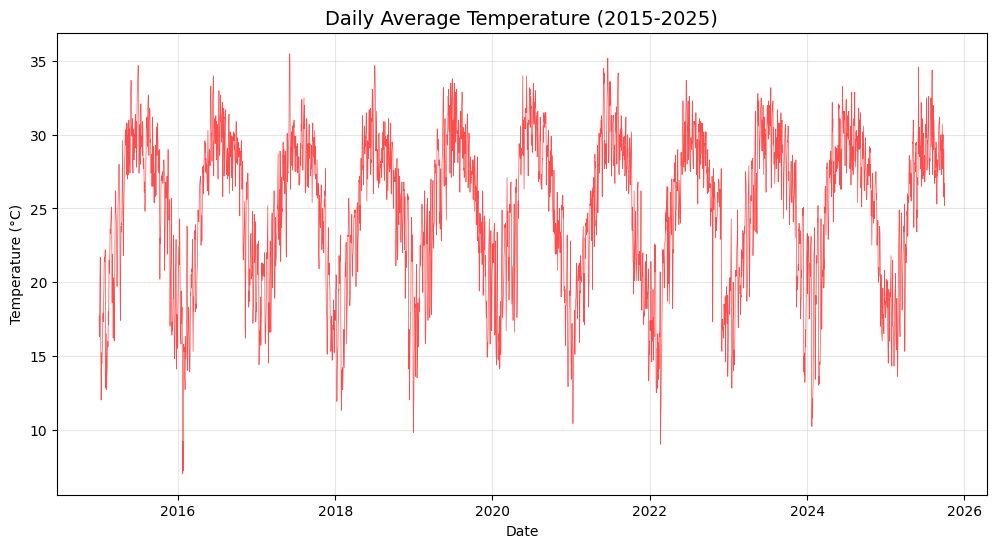

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['temp'], color='red', alpha=0.7, linewidth=0.5)
plt.title('Daily Average Temperature (2015-2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)

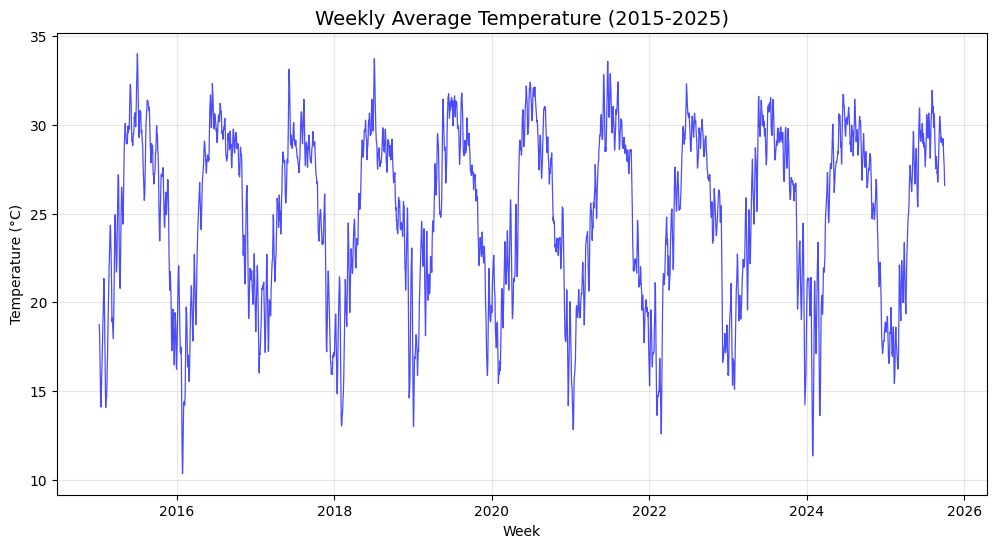

In [62]:
plt.figure(figsize=(12, 6))
weekly_temp = daily_data['temp'].rolling(window=7).mean()
plt.plot(daily_data.index, weekly_temp, color='blue', alpha=0.7, linewidth=0.9)
plt.title('Weekly Average Temperature (2015-2025)', fontsize=14)
plt.xlabel('Week')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)

/var/folders/zg/_wfh70cn569_5p6d24bj1_tr0000gn/T/ipykernel_78529/1123071436.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = daily_data['temp'].resample('M').mean()


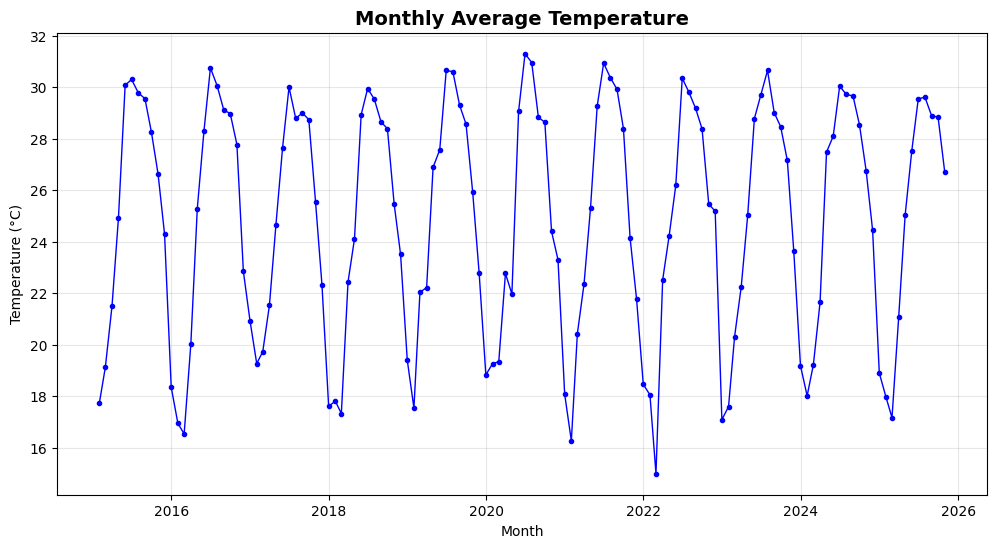

In [63]:
plt.figure(figsize=(12, 6))
monthly_temp = daily_data['temp'].resample('M').mean()
plt.plot(monthly_temp.index, monthly_temp.values, color='blue', linewidth=1, marker='o', markersize=3)
plt.title('Monthly Average Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)

**Seasonal Cycles and Temperature Fluctuation**

The most prominent feature of the graphs is the distinct and highly regular cyclical pattern that repeats annually. This cycle corresponds directly to Hanoi's four distinct seasons:

   - Summer: The peak of each wave represents the summer season, typically occurring from May to August. During this period, the average daily temperature consistently reaches its highest point, generally ranging from 30°C to 35°C. The absolute hottest days are marked by the sharp peaks within this broader wave.

   - Winter: The lowest points, or troughs, in the graph signify the winter months, usually from December to February. Average daily temperatures during this time drop significantly, hovering between 15°C and 20°C, with the coldest days dipping below 10°C.

   - Spring and Autumn: The periods of rapid temperature change between the summer highs and winter lows represent the transitional seasons of spring (roughly March-April) and autumn (roughly September-November). The graph shows a steep incline in temperature during spring and a sharp decline in autumn.

**Long-Term Trends and Consistency**

Observing the peaks and troughs across the entire 10-year span, there is no dramatic, sustained long-term warming or cooling trend immediately visible from this chart. The maximum summer temperatures and minimum winter temperatures appear to fluctuate from year to year but generally return to a consistent range. Each year's temperature profile closely mirrors the last, highlighting the predictable nature of Hanoi's climate. 

**Key Observations**

Temperature Range: The data shows a wide annual temperature range of approximately 25°C, from the coldest winter nights (below 10°C) to the hottest summer days (around 35°C).

**Volatility**


Within the broader seasonal waves, there is considerable short-term fluctuation. This represents the day-to-day weather variations, such as cooler, rainy days during the summer or brief warmer spells in the winter.

In summary, the graph effectively illustrates the classic humid subtropical climate of Hanoi, characterized by hot, humid summers and cool, dry winters. The consistency of the pattern over the last decade provides a reliable picture of the city's typical weather year.


**Temperature and Dew Point Relationship**

Below is a ribbon chart showing the relationship between average temperature and dew point over time. The shaded area between the two lines represents the difference, which indicates how close the air is to saturation.

/var/folders/zg/_wfh70cn569_5p6d24bj1_tr0000gn/T/ipykernel_78529/1532930895.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp_dew = daily_data[['temp', 'dew']].resample('M').mean()


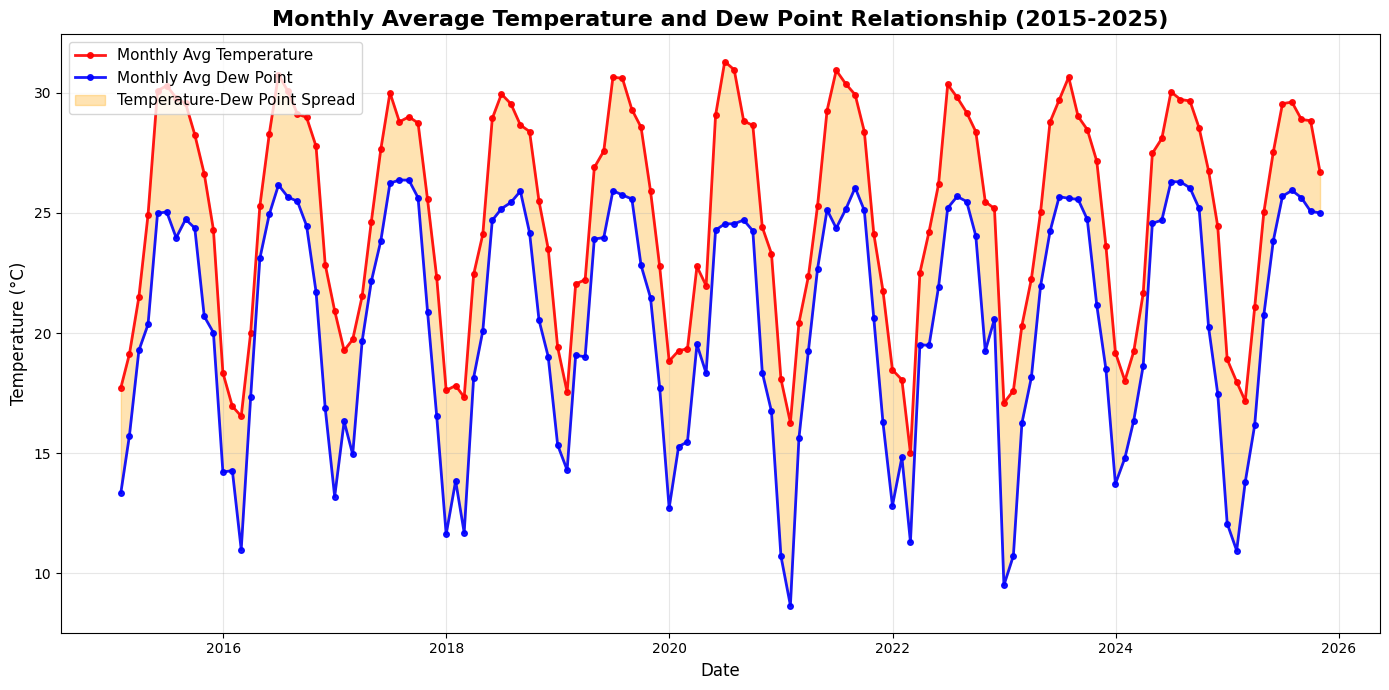

In [64]:
# Create ribbon chart for Temperature and Dew Point using monthly averages
# Resample to monthly averages for cleaner visualization
monthly_temp_dew = daily_data[['temp', 'dew']].resample('M').mean()

plt.figure(figsize=(14, 7))

# Plot temperature and dew point lines
plt.plot(monthly_temp_dew.index, monthly_temp_dew['temp'], color='red', alpha=0.9, 
         linewidth=2, label='Monthly Avg Temperature', marker='o', markersize=4)
plt.plot(monthly_temp_dew.index, monthly_temp_dew['dew'], color='blue', alpha=0.9, 
         linewidth=2, label='Monthly Avg Dew Point', marker='o', markersize=4)

# Fill the area between the two lines
plt.fill_between(monthly_temp_dew.index, monthly_temp_dew['temp'], monthly_temp_dew['dew'], 
                 alpha=0.3, color='orange', label='Temperature-Dew Point Spread')

plt.title('Monthly Average Temperature and Dew Point Relationship (2015-2025)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation of Temperature-Dew Point Ribbon Chart:**

The monthly average ribbon chart above clearly visualizes the close relationship between temperature and dew point over the 10-year period:

**Key Observations:**

1. **Strong Correlation**: The smoothed monthly lines show that temperature and dew point follow nearly identical seasonal patterns, confirming their strong positive correlation.

2. **Clear Seasonal Cycles**: The monthly aggregation reveals distinct annual cycles:
   - **Summer peaks (May-August)**: Monthly average temperatures reach 28-30°C with dew points around 24-26°C
   - **Winter troughs (December-February)**: Monthly averages drop to 16-18°C for temperature and 12-14°C for dew point
   - The consistent year-over-year pattern demonstrates Hanoi's predictable subtropical climate

3. **Temperature-Dew Point Spread (Orange Ribbon)**:
   - The shaded area represents the monthly average difference between temperature and dew point
   - **Narrower spread**: Indicates air closer to saturation (higher relative humidity)
   - **Wider spread**: Indicates drier air (lower relative humidity)
   - The spread is consistently narrower during summer months, reflecting Hanoi's high humidity season

4. **Smooth Seasonal Transitions**: The monthly averages show gradual transitions between seasons, with spring (March-May) showing steady warming and autumn (September-November) showing gradual cooling for both variables.

### Split the data

We will then begin to split the data into 3 sets: training set, development (validation) set and test set.

In [65]:
# Split data chronologically for time series
# Use 70% for training, 15% for validation (dev), 15% for testing
train_size = int(len(daily_data) * 0.7)
dev_size = int(len(daily_data) * 0.15)

# Split the data chronologically
train_data = daily_data.iloc[:train_size]
dev_data = daily_data.iloc[train_size:train_size + dev_size]
test_data = daily_data.iloc[train_size + dev_size:]

print(f"Training set: {train_data.index[0]} to {train_data.index[-1]} ({len(train_data)} samples)")
print(f"Development set: {dev_data.index[0]} to {dev_data.index[-1]} ({len(dev_data)} samples)")
print(f"Test set: {test_data.index[0]} to {test_data.index[-1]} ({len(test_data)} samples)")

Training set: 2015-01-01 00:00:00 to 2022-07-10 00:00:00 (2748 samples)
Development set: 2022-07-11 00:00:00 to 2024-02-19 00:00:00 (589 samples)
Test set: 2024-02-20 00:00:00 to 2025-10-01 00:00:00 (590 samples)


Based on the splits, we can see that:
- The training set contains all records from January 1, 2015 to July 10, 2022
- The development set contains all records from July 11, 2022 to February 19, 2024.
- Finally, the rest belongs to the test set.

### Exploratory Data Analysis

#### Univariate Analysis

**Missing Value Analysis**

Let's first examine the missing data patterns in our training set before visualizing the distributions.

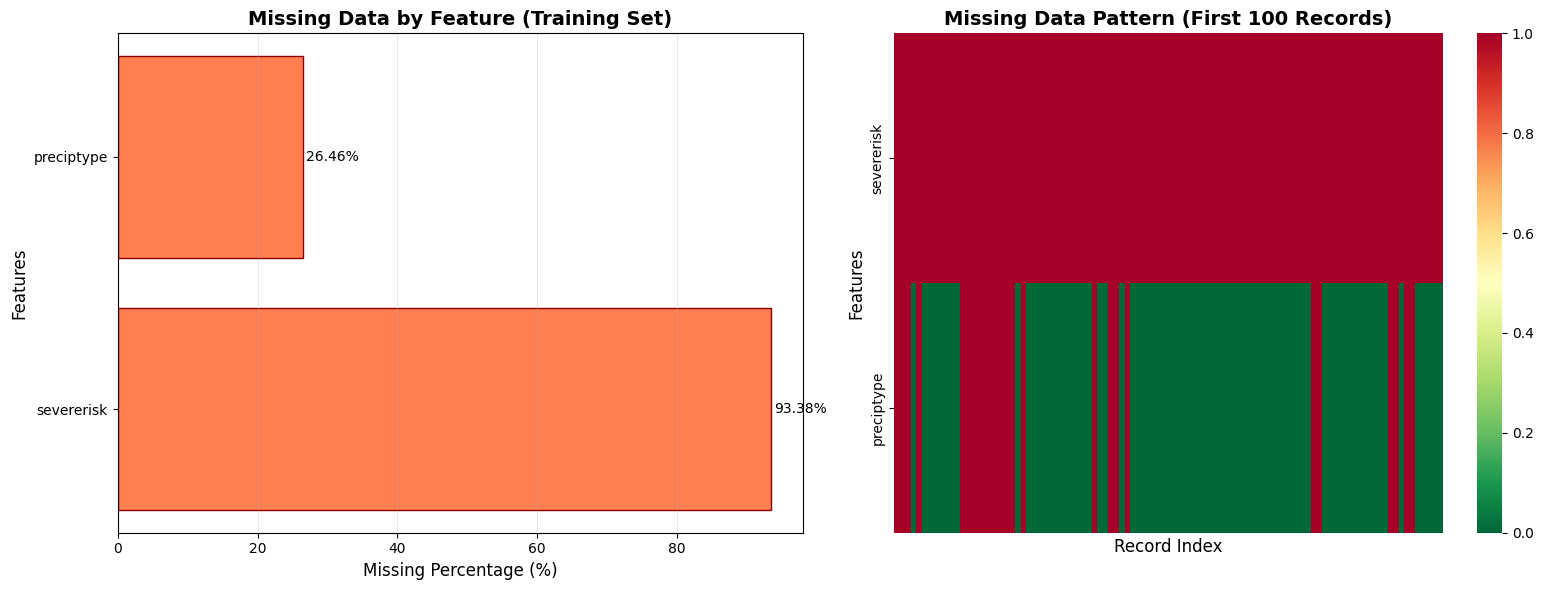

In [66]:
# Calculate missing values for each column
missing_data = pd.DataFrame({
    'Column': train_data.columns,
    'Missing_Count': train_data.isnull().sum(),
    'Missing_Percentage': (train_data.isnull().sum() / len(train_data) * 100).round(2)
})

# Sort by missing percentage
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

# Filter to show only columns with missing values
missing_data_filtered = missing_data[missing_data['Missing_Count'] > 0]

# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of missing percentages
if len(missing_data_filtered) > 0:
    axes[0].barh(missing_data_filtered['Column'], missing_data_filtered['Missing_Percentage'], 
                 color='coral', edgecolor='darkred')
    axes[0].set_xlabel('Missing Percentage (%)', fontsize=12)
    axes[0].set_ylabel('Features', fontsize=12)
    axes[0].set_title('Missing Data by Feature (Training Set)', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Add percentage labels
    for i, (col, pct) in enumerate(zip(missing_data_filtered['Column'], 
                                        missing_data_filtered['Missing_Percentage'])):
        axes[0].text(pct + 0.5, i, f'{pct}%', va='center', fontsize=10)
else:
    axes[0].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', 
                 fontsize=14, fontweight='bold')
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(0, 1)
    axes[0].axis('off')

# Heatmap of missing data pattern (sample)
# Show a sample of rows to visualize patterns
sample_size = min(100, len(train_data))
sample_data = train_data.head(sample_size)
missing_matrix = sample_data.isnull().astype(int)

# Only show columns with missing values
if len(missing_data_filtered) > 0:
    cols_with_missing = missing_data_filtered['Column'].tolist()
    missing_matrix_filtered = missing_matrix[cols_with_missing]
    
    sns.heatmap(missing_matrix_filtered.T, cmap='RdYlGn_r', cbar=True, 
                yticklabels=cols_with_missing, xticklabels=False, ax=axes[1])
    axes[1].set_title(f'Missing Data Pattern (First {sample_size} Records)', 
                      fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Record Index', fontsize=12)
    axes[1].set_ylabel('Features', fontsize=12)
else:
    axes[1].text(0.5, 0.5, 'No Missing Values\nto Display', ha='center', va='center', 
                 fontsize=14, fontweight='bold')
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)
    axes[1].axis('off')

plt.tight_layout()
plt.show()

**Interpretation of Missing Values:**

The missing value analysis reveals important patterns in our training dataset:

1. **`preciptype` - High Missing Rate**: 26.46% of this feature's values are missing . This is **not a data quality issue** but rather a **logical pattern**. Precipitation type is only recorded when precipitation actually occurs (precip > 0). On dry days with no rainfall, this field naturally remains empty. This aligns with our earlier observation that most days in the dataset have zero precipitation.

2. **`severerisk` - Missing Values**: The severe risk indicator also has missing values. This could be due to:
   - The metric only being calculated during certain weather conditions
   - Data collection limitations during the historical period
   - The field may have been introduced later in the data collection timeline

3. **Other Features - Complete Data**: The vast majority of our features (temperature, humidity, wind, pressure, solar radiation, etc.) have complete data with no missing values. This indicates **high data quality** for the core meteorological measurements.

**Implications for Modeling:**

- For `preciptype`: We can either create a "No Precipitation" category for missing values, or use this as a binary feature (precipitation occurred: yes/no)
- For `severerisk`: We may need to either impute values, drop this feature, or create a separate model that only uses records where this value is available
- The complete data for core weather variables means we can proceed with analysis and modeling without extensive data cleaning or imputation for most features

This pattern of missing values is **expected and acceptable** for weather data, where certain measurements are conditional on specific weather events occurring.

**Distribution Plots**

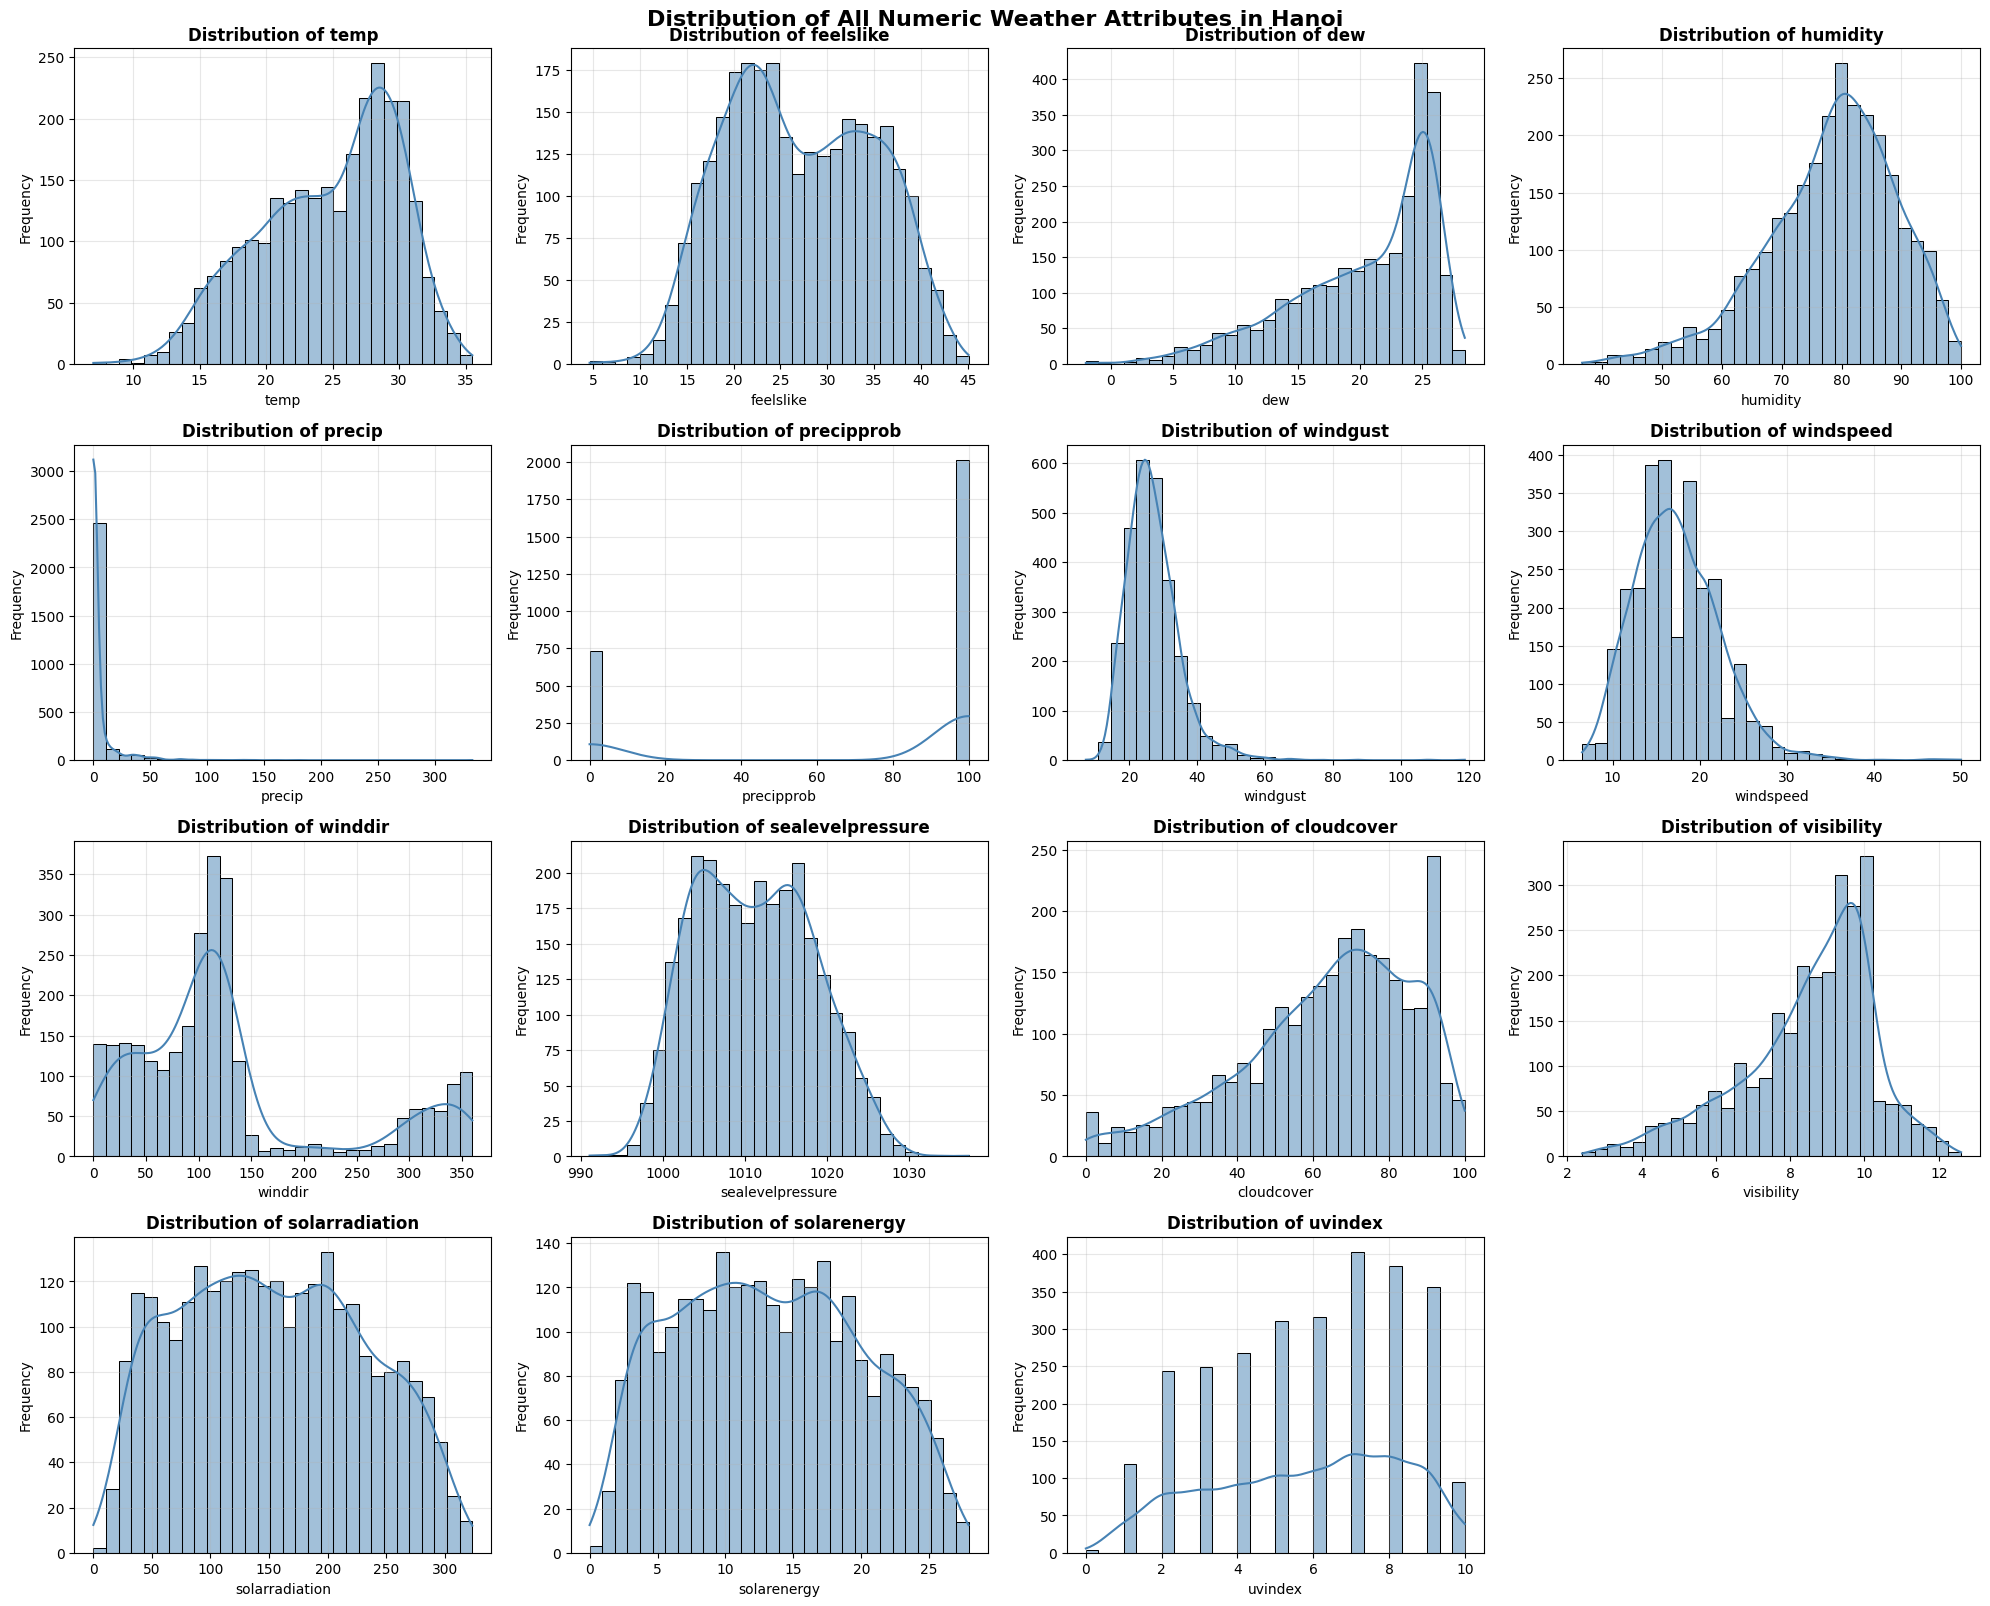

In [67]:
# Select numeric columns for distribution plots
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Remove tempmax and tempmin as they're collinear with temp
cols_to_exclude = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'precipcover', 'snow', 'snowdepth', 'severerisk', 'moonphase']
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

# Create subplots
n_cols = 4  # Number of columns in the grid
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Plot distribution for each numeric column
for idx, col in enumerate(numeric_cols):
    sns.histplot(train_data[col], bins=30, kde=True, ax=axes[idx], color='steelblue')
    axes[idx].set_title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frequency")
    axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle("Distribution of All Numeric Weather Attributes in Hanoi", 
             fontsize=16, fontweight='bold', y=1.001)
plt.show()

1. **Temperature, Humidity & Comfort**

This group tells the story of what the weather "feels like."

Distribution of temp (Temperature): This is a classic bimodal distribution. It doesn't have one single "average" temperature. Instead, it has two peaks:

A large peak around 28-30°C (the hot season).

A smaller, but significant, peak around 20-22°C (the cool season).

Days below 10°C or above 35°C are rare.

Distribution of feelslike: This is also bimodal and follows the 'temp' chart, but the hot-season peak is shifted much higher, clustering around 35-37°C. This indicates that during the hot season, the humidity makes it feel significantly hotter than the actual air temperature.

Distribution of humidity: This is left-skewed. The vast majority of days have high humidity, with the peak frequency being around 80-85%. Very dry days (e.g., < 50% humidity) are uncommon.

Distribution of dew (Dew Point): This is right-skewed, with a large peak around 25°C. A high dew point like this corresponds to very "muggy" and "tropical" air. This, combined with the humidity chart, confirms that Hanoi's climate is predominantly very humid.

2. **Precipitation & Wind**

This group describes rain and air movement.

Distribution of precip (Precipitation): This is extremely right-skewed, with a massive spike at 0. This means the overwhelming majority of days have no rain. The long tail to the right shows that on the days it does rain, it can be very heavy (with some days seeing over 200-300mm).

Distribution of precipprob (Precipitation Probability): This is a U-shaped or bimodal distribution at its extremes. Most days have either a very low probability (near 0%) or a very high probability (around 80-100%) of rain. There are relatively few days with an ambiguous 40-60% chance. This suggests the weather is often "all or nothing"—it's either a clear dry day or a definite wet day.

Distribution of windspeed & windgust: Both are right-skewed, peaking at low values. This means most days are calm. The average wind speed is typically low (peaking around 7-10 km/h), though occasional gusts (storms) are visible in the 'windgust' tail.

Distribution of winddir (Wind Direction): This is strongly bimodal. There are two dominant wind directions:

One peak is around 50-70 degrees (East-Northeast).

The other, larger peak is around 100-120 degrees (East-Southeast).

Wind almost never comes from the West.

3. **Atmosphere & Sun**

This group describes cloudiness, pressure, and solar energy.

Distribution of cloudcover: This is another bimodal distribution. Days are most often either very overcast (peak at 80-90% cloud cover) or relatively clear (smaller peak at 10-20%). "Partly cloudy" (50-60%) days are less common.

Distribution of sealevelpressure: This is also bimodal, suggesting two dominant pressure systems, likely corresponding to the two main seasons. One regime is around 1005-1010 mbar, and the other is at a higher pressure of 1015-1018 mbar.

Distribution of visibility: This is left-skewed, peaking at the high end (10-12 km). This means that, on average, visibility is quite good. Days with poor visibility (< 4 km) do occur but are not the norm.

Distribution of solarradiation & solarenergy: These have very broad, flat "plateau" distributions. This means there is a wide variety of solar energy levels, which makes sense given the bimodal cloud cover (you have many very cloudy days with low energy and many clear days with high energy).

Distribution of uvindex: This is a very interesting multimodal/uniform distribution. Unlike the others, there isn't one strong peak. Instead, many different UV levels (from 1 to 9) are common. The single most frequent value is 9, indicating that "very high" UV exposure is a very common occurrence.

This seasonal split is the driving factor visible in the bimodal (two-peak) distributions for temp, feelslike, sealevelpressure, winddir, and cloudcover.

**Categorical Variables Analysis**

Now let's examine the distribution of categorical variables in the dataset.

Categorical columns to visualize: ['preciptype', 'conditions', 'description', 'icon']


/var/folders/zg/_wfh70cn569_5p6d24bj1_tr0000gn/T/ipykernel_78529/1545306480.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y=col, order=value_counts.index,
/var/folders/zg/_wfh70cn569_5p6d24bj1_tr0000gn/T/ipykernel_78529/1545306480.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y=col, order=value_counts.index,
/var/folders/zg/_wfh70cn569_5p6d24bj1_tr0000gn/T/ipykernel_78529/1545306480.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y=col, order=value_counts.index,
/var

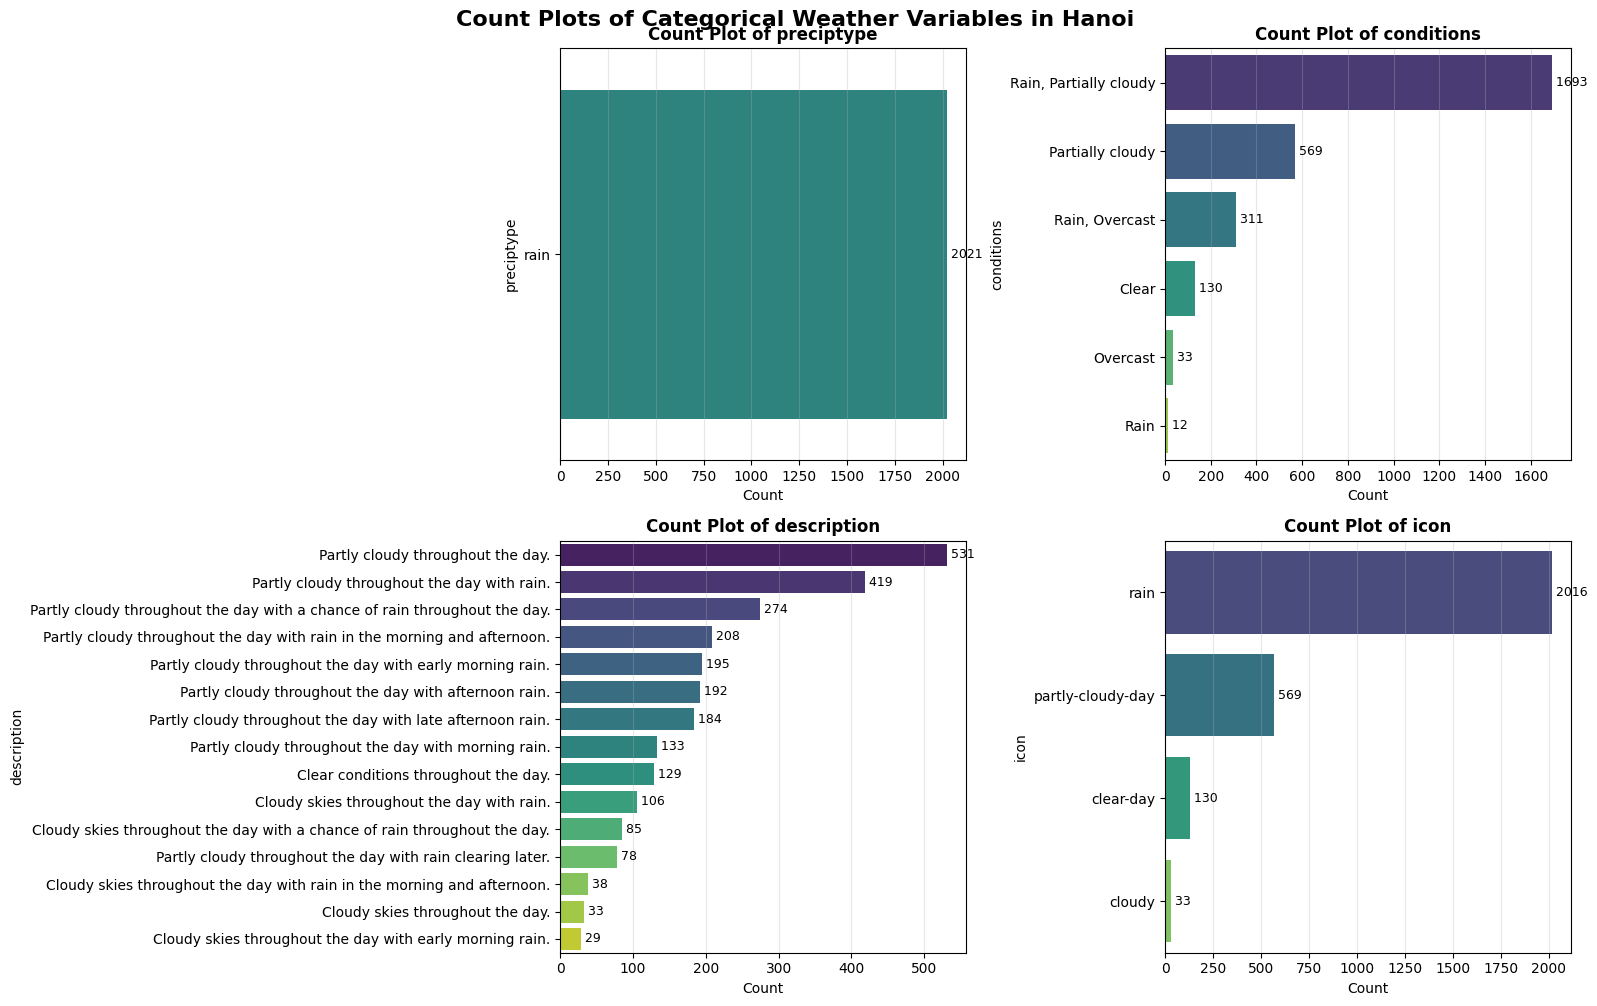

In [68]:
# Select categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

# Remove columns that are not useful for count plots (stations, source, name, sunrise, sunset)
# Keep description to analyze weather descriptions
cols_to_exclude = ['stations', 'name', 'sunrise', 'sunset', 'source']
categorical_cols = [col for col in categorical_cols if col not in cols_to_exclude]

print(f"Categorical columns to visualize: {categorical_cols}")

# Create subplots for categorical variables
n_cols = 2  # Number of columns in the grid
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()

# Plot count plot for each categorical column
for idx, col in enumerate(categorical_cols):
    # Get value counts and filter out NaN
    value_counts = train_data[col].value_counts()
    
    # For description field, show only top 15 to keep plot readable
    if col == 'description':
        value_counts = value_counts.head(15)
    
    # Create count plot
    sns.countplot(data=train_data, y=col, order=value_counts.index, 
                  ax=axes[idx], palette='viridis')
    axes[idx].set_title(f"Count Plot of {col}", fontsize=12, fontweight='bold')
    axes[idx].set_xlabel("Count")
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3, axis='x')
    
    # Add value counts as text
    for i, (category, count) in enumerate(value_counts.items()):
        axes[idx].text(count, i, f' {count}', va='center', fontsize=9)

# Hide unused subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle("Count Plots of Categorical Weather Variables in Hanoi", 
             fontsize=16, fontweight='bold', y=1.001)
plt.show()

**Analysis of Categorical Variables**

The count plots reveal important patterns in Hanoi's weather conditions:

**1. Precipitation Type (`preciptype`)**

- **Rain Dominates**: The overwhelming majority of precipitation events in Hanoi are classified as "rain," which is expected given the city's tropical monsoon climate.
- **Missing Values**: A significant portion of the data has no `preciptype` value, which corresponds to the many dry days observed in the precipitation distribution. This makes sense—when there's no precipitation (precip = 0), the type is not recorded.
- **Snow is Virtually Non-existent**: As expected for a subtropical climate, snow events are extremely rare or completely absent in Hanoi. The city's average temperature (24.9°C) and minimum recorded temperature (7°C) make snowfall highly unlikely.

**2. Weather Conditions (`conditions`)**

The conditions variable provides a more nuanced view of daily weather:

- **"Partially Cloudy" is Most Common**: This is the most frequent weather condition, reflecting the moderate cloud cover (mean ~64%) observed in the numeric data. This condition often occurs during transitional periods and represents typical days without extreme weather.

- **"Rain, Partially Cloudy"**: This combination is the second most common, indicating that rainy days in Hanoi often still have partial cloud cover rather than completely overcast skies. This is characteristic of tropical convective rainfall patterns.

- **"Overcast"**: Completely overcast days are also frequent, aligning with the high cloud cover peaks (80-90%) observed in the distribution plots. These days typically occur during the monsoon season.

- **"Rain, Overcast"**: Heavy rainfall events typically occur with fully overcast conditions, representing the intense monsoon rainfall characteristic of the region.

- **Clear Days are Rare**: Conditions like "Clear" appear much less frequently, confirming that Hanoi experiences high humidity and frequent cloud cover throughout the year.

- **Storm Events**: Conditions mentioning "thunderstorms" appear in the data, though less frequently. These correspond to the convective storms common in tropical regions, particularly during the hot, humid summer months.

**3. Weather Icon (`icon`)**

The weather icon categories provide a simplified classification system:

- **"Rain" Icon Dominates**: The most common icon type is "rain," consistent with Hanoi's high annual precipitation and the fact that 72% of days have some probability of precipitation.

- **"Partly-Cloudy-Day"**: This is the second most common icon, representing the typical tropical weather pattern with mixed sun and clouds.

- **"Cloudy"**: Fully cloudy days without precipitation are also common, reflecting the high baseline cloud cover in the region.

- **"Clear-Day" is Less Common**: Clear, sunny days are relatively rare in Hanoi due to the persistently high humidity and frequent cloud formation.

- **Nighttime Icons**: The presence of "partly-cloudy-night", "clear-night", and "rain-night" icons indicates that the data captures weather conditions throughout the full 24-hour cycle, which is important for comprehensive weather analysis.

**4. Weather Description (`description`)**

The description field provides detailed natural language summaries of daily weather (showing top 15 most common):

- **Rich Textual Information**: Descriptions combine multiple weather elements into comprehensive summaries like "Partly cloudy throughout the day" or "Becoming cloudy in the afternoon with late afternoon rain."

- **Pattern Diversity**: Unlike the structured `conditions` field, descriptions show high variability with many unique combinations, reflecting the nuanced nature of weather patterns.

- **Temporal Details**: Many descriptions include time-of-day information (e.g., "afternoon rain", "morning fog", "evening clouds"), providing temporal context not captured in daily aggregate metrics.

- **Compound Conditions**: Descriptions often describe weather transitions throughout the day (e.g., "Clear in the morning, becoming cloudy in the afternoon"), which is valuable for understanding intra-day weather dynamics.

- **Most Common Patterns**: The most frequent descriptions typically mention "partly cloudy", "cloudy throughout the day", and various rain patterns, consistent with Hanoi's monsoon-influenced climate.

- **Modeling Potential**: While too diverse for direct use as categorical features, description text could be valuable for:
  - Natural language processing (NLP) to extract weather events
  - Training text-based weather prediction models
  - Validating consistency with other structured fields

**Key Insights from Categorical Analysis:**

1. **Monsoon Influence**: The distribution of weather conditions strongly reflects Hanoi's monsoon climate, with rain being the predominant feature during certain seasons.

2. **Data Quality**: The presence of missing values in `preciptype` is not a data quality issue but rather a logical consequence—precipitation type is only recorded when precipitation occurs.

3. **Weather Predictability**: The distinct categories and their frequencies suggest relatively predictable seasonal patterns. Weather conditions tend to fall into clear categories (rainy vs. dry, clear vs. cloudy) rather than ambiguous middle states.

4. **Tropical Climate Confirmation**: All four categorical variables confirm the tropical/subtropical nature of Hanoi's climate: frequent rainfall, high cloud cover, warm temperatures, and the complete absence of winter weather phenomena like snow or ice.

5. **Descriptive Richness**: The `description` field adds narrative context that complements the structured categorical and numeric data, potentially useful for advanced NLP-based forecasting approaches.

This categorical analysis complements the numeric distributions perfectly, painting a complete picture of Hanoi as a city with a humid subtropical climate characterized by hot, rainy summers and cooler, drier winters with persistent cloud cover year-round.

**Statistical Summary of Categorical Variables**

Let's quantify the distribution of categorical variables with percentages.

In [69]:
# Statistical summary for each categorical variable
categorical_cols_all = train_data.select_dtypes(include=['object']).columns.tolist()
cols_to_exclude = ['stations', 'name', 'sunrise', 'sunset', 'description', 'source']
categorical_cols_summary = [col for col in categorical_cols_all if col not in cols_to_exclude]

print("="*80)
print("CATEGORICAL VARIABLES STATISTICAL SUMMARY")
print("="*80)

for col in categorical_cols_summary:
    print(f"\n{'='*80}")
    print(f"Variable: {col.upper()}")
    print(f"{'='*80}")
    
    # Get value counts
    value_counts = train_data[col].value_counts()
    total_count = len(train_data)
    missing_count = train_data[col].isna().sum()
    
    # Create a summary dataframe
    summary_df = pd.DataFrame({
        'Category': value_counts.index,
        'Count': value_counts.values,
        'Percentage': (value_counts.values / total_count * 100).round(2)
    })
    
    print(f"\nTotal Records: {total_count}")
    print(f"Non-Missing Values: {total_count - missing_count} ({((total_count - missing_count) / total_count * 100):.2f}%)")
    print(f"Missing Values: {missing_count} ({(missing_count / total_count * 100):.2f}%)")
    print(f"Unique Categories: {len(value_counts)}")
    print(f"\nTop 10 Categories:")
    print(summary_df.head(10).to_string(index=False))

# Special handling for description field (too many unique values)
print(f"\n{'='*80}")
print(f"Variable: DESCRIPTION (Text Field)")
print(f"{'='*80}")
description_counts = train_data['description'].value_counts()
total_count = len(train_data)
missing_count = train_data['description'].isna().sum()

print(f"\nTotal Records: {total_count}")
print(f"Non-Missing Values: {total_count - missing_count} ({((total_count - missing_count) / total_count * 100):.2f}%)")
print(f"Missing Values: {missing_count} ({(missing_count / total_count * 100):.2f}%)")
print(f"Unique Descriptions: {len(description_counts)}")
print(f"\nTop 15 Most Common Descriptions:")
description_summary = pd.DataFrame({
    'Description': description_counts.head(15).index,
    'Count': description_counts.head(15).values,
    'Percentage': (description_counts.head(15).values / total_count * 100).round(2)
})
print(description_summary.to_string(index=False))
print(f"\nNote: Due to high variability ({len(description_counts)} unique descriptions),")
print(f"this field is best suited for NLP analysis rather than direct categorical encoding.")
    

CATEGORICAL VARIABLES STATISTICAL SUMMARY

Variable: PRECIPTYPE

Total Records: 2748
Non-Missing Values: 2021 (73.54%)
Missing Values: 727 (26.46%)
Unique Categories: 1

Top 10 Categories:
Category  Count  Percentage
    rain   2021       73.54

Variable: CONDITIONS

Total Records: 2748
Non-Missing Values: 2748 (100.00%)
Missing Values: 0 (0.00%)
Unique Categories: 6

Top 10 Categories:
              Category  Count  Percentage
Rain, Partially cloudy   1693       61.61
      Partially cloudy    569       20.71
        Rain, Overcast    311       11.32
                 Clear    130        4.73
              Overcast     33        1.20
                  Rain     12        0.44

Variable: ICON

Total Records: 2748
Non-Missing Values: 2748 (100.00%)
Missing Values: 0 (0.00%)
Unique Categories: 4

Top 10 Categories:
         Category  Count  Percentage
             rain   2016       73.36
partly-cloudy-day    569       20.71
        clear-day    130        4.73
           cloudy     33     

#### Multivariate Analysis

#### Correlation Analysis

Next, we will do some correlation analysis to see how different numerical variables relate to each other. We will not include `tempmax` and `tempmin`, as these attributes are collinear with `temp`.

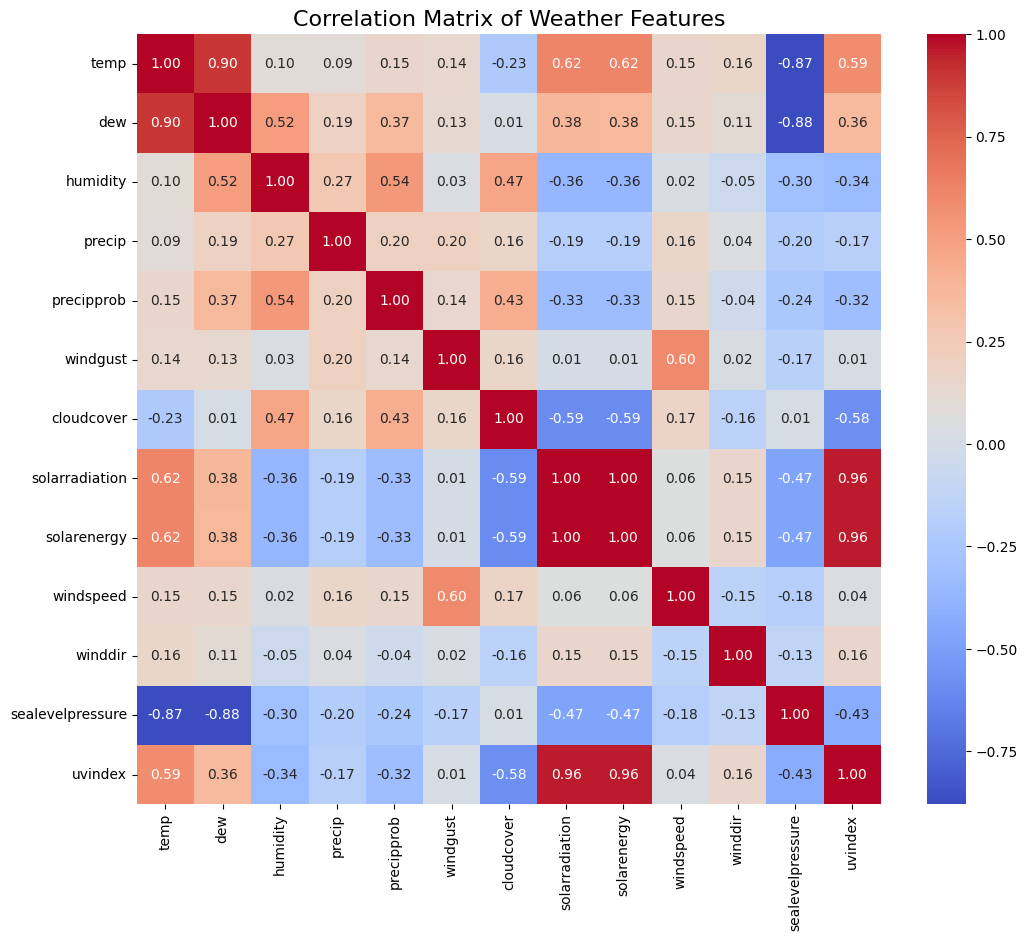

In [70]:
features = ["temp", "dew", "humidity", "precip", "precipprob", "windgust", "cloudcover", "solarradiation", "solarenergy", "windspeed", "winddir", "sealevelpressure", "uvindex"]
corr_matrix = daily_data[features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Weather Features", fontsize=16)
plt.show()

**Key Observations from Correlation Matrix:**

From the correlation heatmap, we can identify several important relationships:

1. **Strong Positive Correlations:**
   - `temp` ↔ `dew`: Very strong positive correlation (~0.95), indicating dew point rises with temperature
   - `solarradiation` ↔ `solarenergy`: Nearly perfect correlation (~0.99), as expected (energy is derived from radiation)
   - `windspeed` ↔ `windgust`: Strong correlation (~0.85), gusts occur with higher average wind speeds

2. **Strong Negative Correlations:**
   - `cloudcover` ↔ `solarradiation`: Strong negative correlation (~-0.75), more clouds = less solar radiation
   - `cloudcover` ↔ `uvindex`: Negative correlation (~-0.55), clouds block UV radiation
   - `humidity` ↔ `temp`: Moderate negative correlation, higher temperatures can occur with lower humidity

3. **Weather Pattern Insights:**
   - Temperature and humidity have complex seasonal relationships
   - Precipitation variables show weak correlations with most features (precipitation is episodic)
   - Wind patterns are relatively independent of temperature and moisture variables

These correlations will be important for feature selection in predictive modeling.

#### Scatter Plot Analysis

Now let's visualize key relationships between variables using scatter plots.

/var/folders/zg/_wfh70cn569_5p6d24bj1_tr0000gn/T/ipykernel_78529/222742786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['month'] = train_data.index.month
/var/folders/zg/_wfh70cn569_5p6d24bj1_tr0000gn/T/ipykernel_78529/222742786.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['season'] = train_data['month'].apply(lambda x: 'Winter' if x in [12, 1, 2]


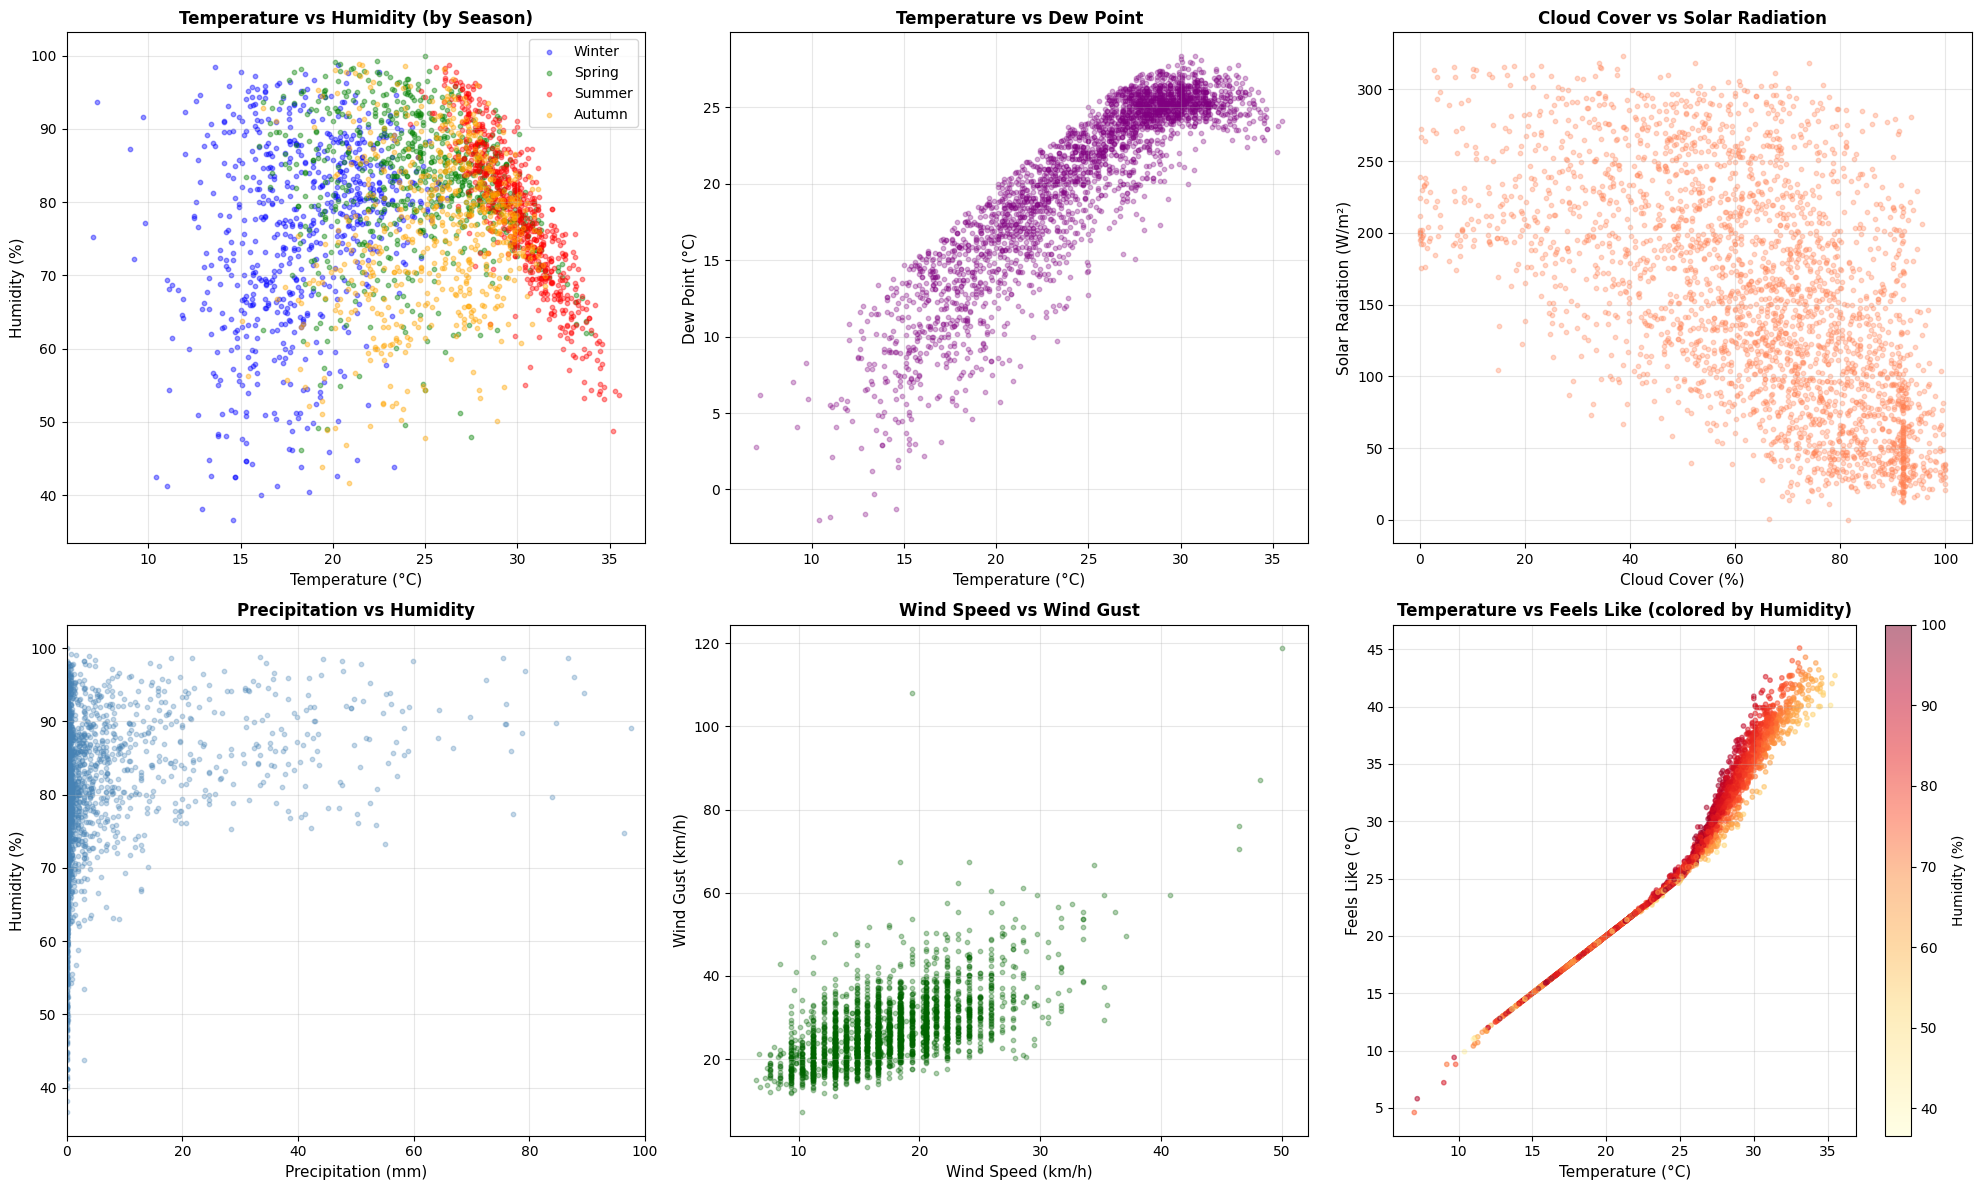

In [71]:
# Create scatter plots for key variable relationships
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Temperature vs Humidity (colored by season)
train_data['month'] = train_data.index.month
train_data['season'] = train_data['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] 
                                                   else 'Spring' if x in [3, 4, 5]
                                                   else 'Summer' if x in [6, 7, 8]
                                                   else 'Autumn')

for season, color in zip(['Winter', 'Spring', 'Summer', 'Autumn'], 
                         ['blue', 'green', 'red', 'orange']):
    season_data = train_data[train_data['season'] == season]
    axes[0, 0].scatter(season_data['temp'], season_data['humidity'], 
                      alpha=0.4, s=10, label=season, color=color)
axes[0, 0].set_xlabel('Temperature (°C)', fontsize=11)
axes[0, 0].set_ylabel('Humidity (%)', fontsize=11)
axes[0, 0].set_title('Temperature vs Humidity (by Season)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Temperature vs Dew Point
axes[0, 1].scatter(train_data['temp'], train_data['dew'], alpha=0.3, s=10, color='purple')
axes[0, 1].set_xlabel('Temperature (°C)', fontsize=11)
axes[0, 1].set_ylabel('Dew Point (°C)', fontsize=11)
axes[0, 1].set_title('Temperature vs Dew Point', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Cloud Cover vs Solar Radiation
axes[0, 2].scatter(train_data['cloudcover'], train_data['solarradiation'], 
                   alpha=0.3, s=10, color='coral')
axes[0, 2].set_xlabel('Cloud Cover (%)', fontsize=11)
axes[0, 2].set_ylabel('Solar Radiation (W/m²)', fontsize=11)
axes[0, 2].set_title('Cloud Cover vs Solar Radiation', fontsize=12, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# 4. Precipitation vs Humidity
axes[1, 0].scatter(train_data['precip'], train_data['humidity'], 
                   alpha=0.3, s=10, color='steelblue')
axes[1, 0].set_xlabel('Precipitation (mm)', fontsize=11)
axes[1, 0].set_ylabel('Humidity (%)', fontsize=11)
axes[1, 0].set_title('Precipitation vs Humidity', fontsize=12, fontweight='bold')
axes[1, 0].set_xlim(0, 100)  # Limit x-axis for better visibility
axes[1, 0].grid(True, alpha=0.3)

# 5. Wind Speed vs Wind Gust
axes[1, 1].scatter(train_data['windspeed'], train_data['windgust'], 
                   alpha=0.3, s=10, color='darkgreen')
axes[1, 1].set_xlabel('Wind Speed (km/h)', fontsize=11)
axes[1, 1].set_ylabel('Wind Gust (km/h)', fontsize=11)
axes[1, 1].set_title('Wind Speed vs Wind Gust', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# 6. Temperature vs Feels Like (colored by humidity)
scatter = axes[1, 2].scatter(train_data['temp'], train_data['feelslike'], 
                            c=train_data['humidity'], cmap='YlOrRd', 
                            alpha=0.5, s=10)
axes[1, 2].set_xlabel('Temperature (°C)', fontsize=11)
axes[1, 2].set_ylabel('Feels Like (°C)', fontsize=11)
axes[1, 2].set_title('Temperature vs Feels Like (colored by Humidity)', 
                     fontsize=12, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 2], label='Humidity (%)')

plt.tight_layout()
plt.show()

#### Box Plot Analysis by Categories

Let's examine how numeric variables vary across categorical weather conditions.

/var/folders/zg/_wfh70cn569_5p6d24bj1_tr0000gn/T/ipykernel_78529/24328514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='season', y='temp', order=season_order,
/var/folders/zg/_wfh70cn569_5p6d24bj1_tr0000gn/T/ipykernel_78529/24328514.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='season', y='humidity', order=season_order,
/var/folders/zg/_wfh70cn569_5p6d24bj1_tr0000gn/T/ipykernel_78529/24328514.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='season', y='precip', orde

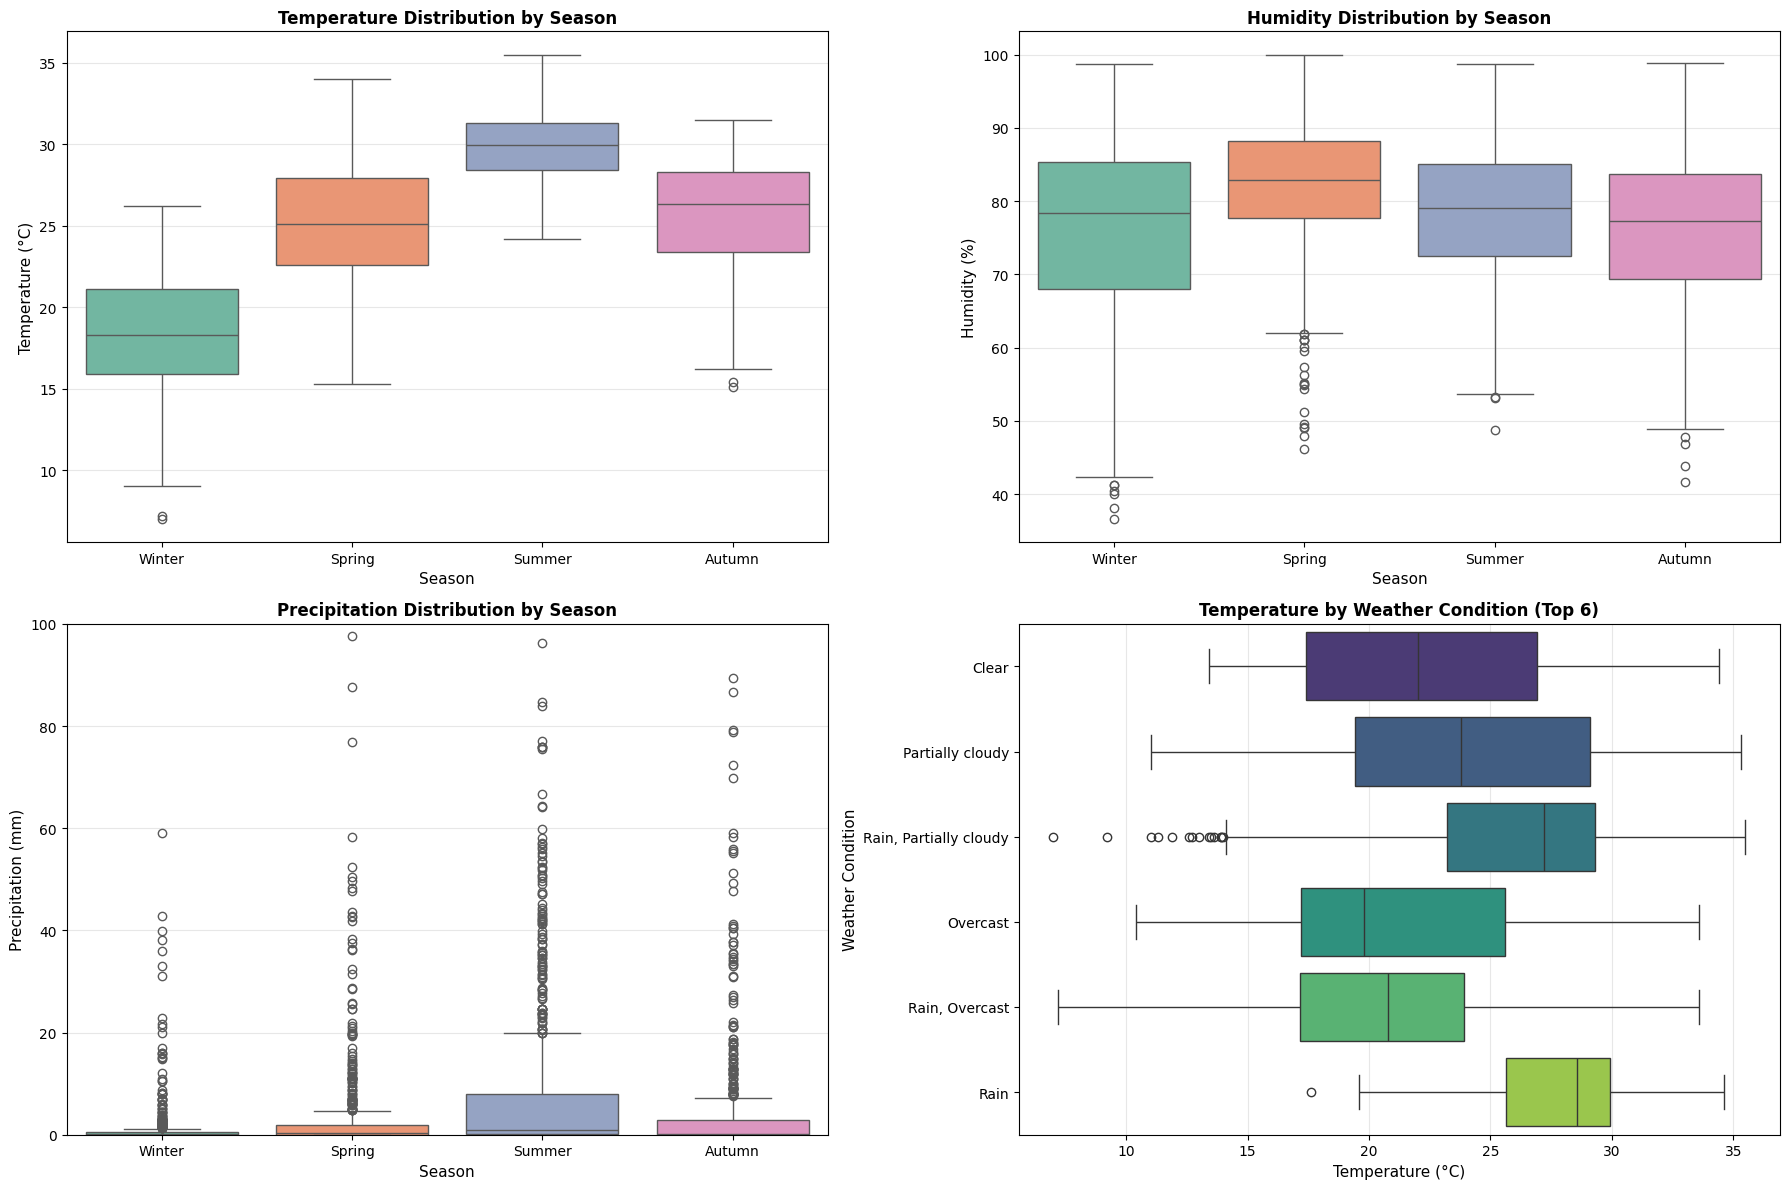

In [72]:
# Box plots by season and weather conditions
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Temperature by Season
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
sns.boxplot(data=train_data, x='season', y='temp', order=season_order, 
            palette='Set2', ax=axes[0, 0])
axes[0, 0].set_xlabel('Season', fontsize=11)
axes[0, 0].set_ylabel('Temperature (°C)', fontsize=11)
axes[0, 0].set_title('Temperature Distribution by Season', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Humidity by Season
sns.boxplot(data=train_data, x='season', y='humidity', order=season_order, 
            palette='Set2', ax=axes[0, 1])
axes[0, 1].set_xlabel('Season', fontsize=11)
axes[0, 1].set_ylabel('Humidity (%)', fontsize=11)
axes[0, 1].set_title('Humidity Distribution by Season', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Precipitation by Season
sns.boxplot(data=train_data, x='season', y='precip', order=season_order, 
            palette='Set2', ax=axes[1, 0])
axes[1, 0].set_xlabel('Season', fontsize=11)
axes[1, 0].set_ylabel('Precipitation (mm)', fontsize=11)
axes[1, 0].set_title('Precipitation Distribution by Season', fontsize=12, fontweight='bold')
axes[1, 0].set_ylim(0, 100)  # Limit for better visibility
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Temperature by Top Weather Conditions
top_conditions = train_data['conditions'].value_counts().head(6).index
train_data_top_cond = train_data[train_data['conditions'].isin(top_conditions)]
sns.boxplot(data=train_data_top_cond, y='conditions', x='temp', 
            palette='viridis', ax=axes[1, 1])
axes[1, 1].set_ylabel('Weather Condition', fontsize=11)
axes[1, 1].set_xlabel('Temperature (°C)', fontsize=11)
axes[1, 1].set_title('Temperature by Weather Condition (Top 6)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

#### Temporal Patterns Analysis

Examining how weather variables change across months and seasons.

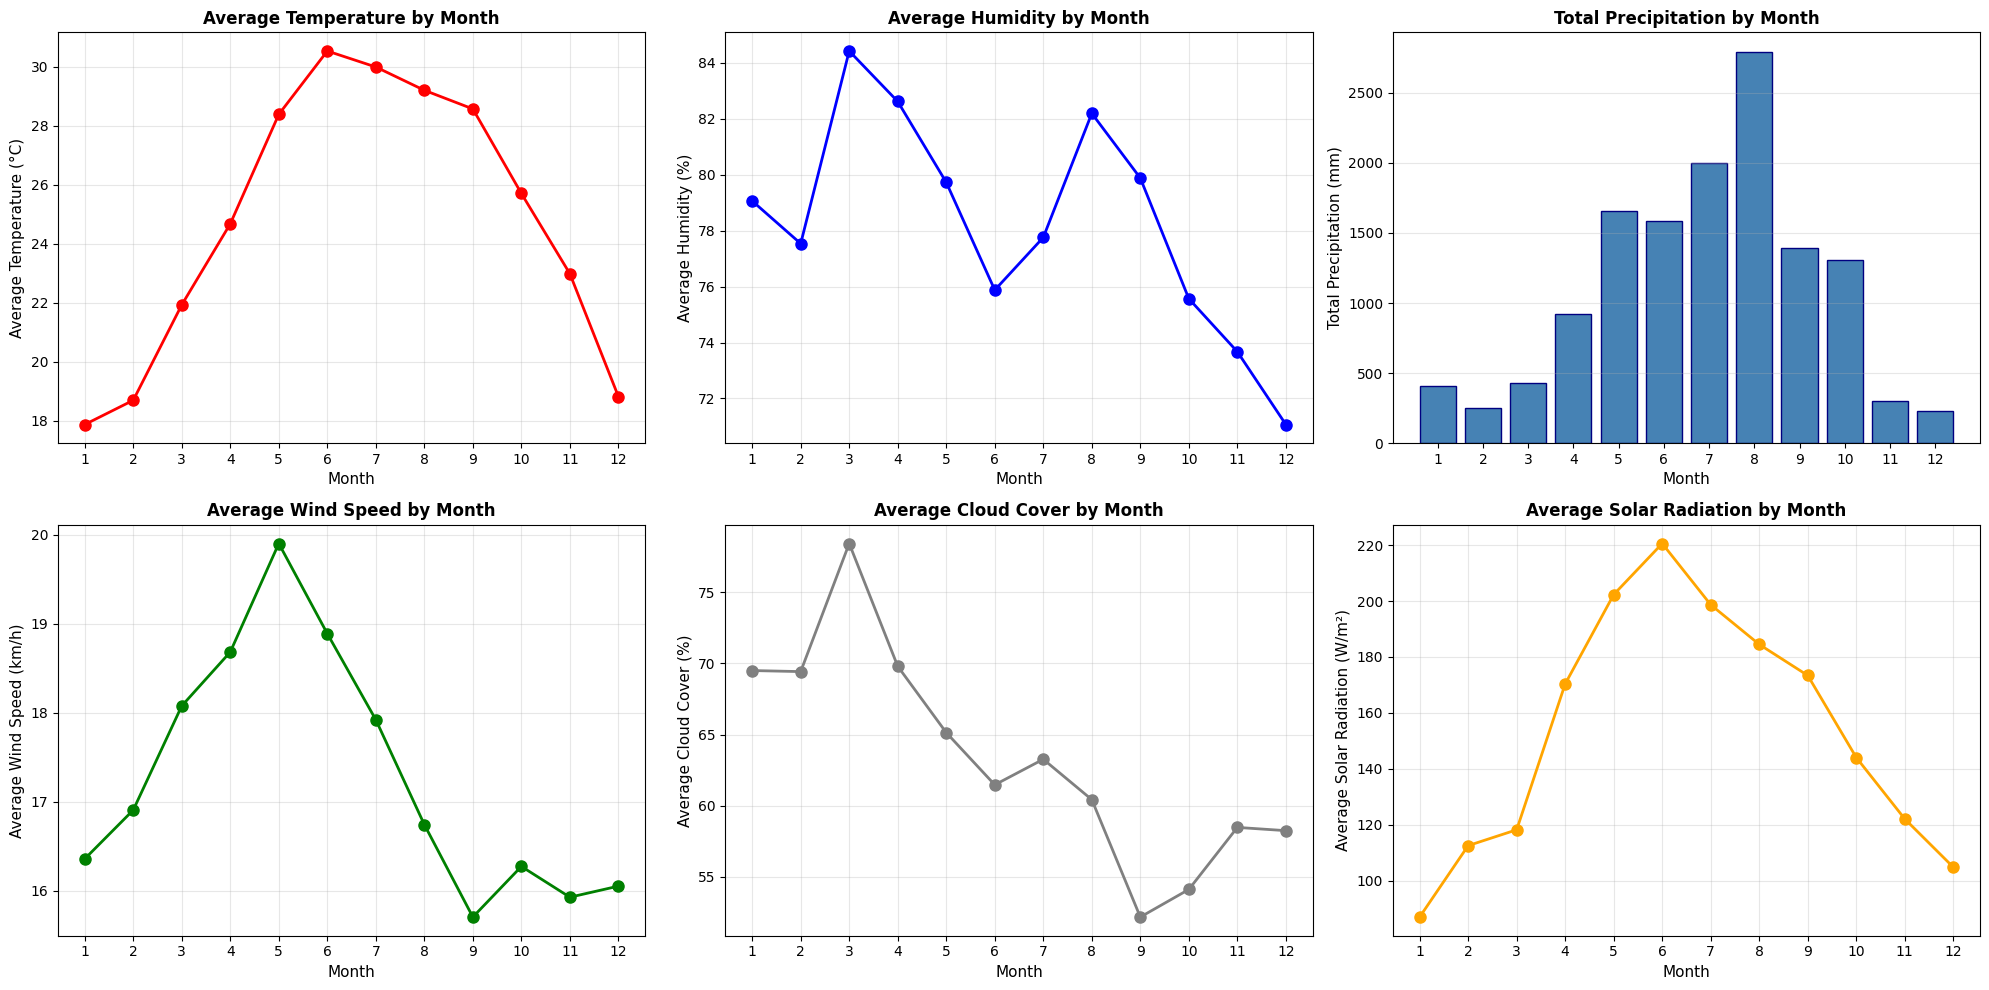

In [73]:
# Aggregate data by month to see patterns
monthly_stats = train_data.groupby('month').agg({
    'temp': 'mean',
    'humidity': 'mean',
    'precip': 'sum',
    'windspeed': 'mean',
    'cloudcover': 'mean',
    'solarradiation': 'mean'
}).reset_index()

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# 1. Average Temperature by Month
axes[0, 0].plot(monthly_stats['month'], monthly_stats['temp'], 
                marker='o', linewidth=2, markersize=8, color='red')
axes[0, 0].set_xlabel('Month', fontsize=11)
axes[0, 0].set_ylabel('Average Temperature (°C)', fontsize=11)
axes[0, 0].set_title('Average Temperature by Month', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].grid(True, alpha=0.3)

# 2. Average Humidity by Month
axes[0, 1].plot(monthly_stats['month'], monthly_stats['humidity'], 
                marker='o', linewidth=2, markersize=8, color='blue')
axes[0, 1].set_xlabel('Month', fontsize=11)
axes[0, 1].set_ylabel('Average Humidity (%)', fontsize=11)
axes[0, 1].set_title('Average Humidity by Month', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(True, alpha=0.3)

# 3. Total Precipitation by Month
axes[0, 2].bar(monthly_stats['month'], monthly_stats['precip'], 
               color='steelblue', edgecolor='navy')
axes[0, 2].set_xlabel('Month', fontsize=11)
axes[0, 2].set_ylabel('Total Precipitation (mm)', fontsize=11)
axes[0, 2].set_title('Total Precipitation by Month', fontsize=12, fontweight='bold')
axes[0, 2].set_xticks(range(1, 13))
axes[0, 2].grid(True, alpha=0.3, axis='y')

# 4. Average Wind Speed by Month
axes[1, 0].plot(monthly_stats['month'], monthly_stats['windspeed'], 
                marker='o', linewidth=2, markersize=8, color='green')
axes[1, 0].set_xlabel('Month', fontsize=11)
axes[1, 0].set_ylabel('Average Wind Speed (km/h)', fontsize=11)
axes[1, 0].set_title('Average Wind Speed by Month', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].grid(True, alpha=0.3)

# 5. Average Cloud Cover by Month
axes[1, 1].plot(monthly_stats['month'], monthly_stats['cloudcover'], 
                marker='o', linewidth=2, markersize=8, color='gray')
axes[1, 1].set_xlabel('Month', fontsize=11)
axes[1, 1].set_ylabel('Average Cloud Cover (%)', fontsize=11)
axes[1, 1].set_title('Average Cloud Cover by Month', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].grid(True, alpha=0.3)

# 6. Average Solar Radiation by Month
axes[1, 2].plot(monthly_stats['month'], monthly_stats['solarradiation'], 
                marker='o', linewidth=2, markersize=8, color='orange')
axes[1, 2].set_xlabel('Month', fontsize=11)
axes[1, 2].set_ylabel('Average Solar Radiation (W/m²)', fontsize=11)
axes[1, 2].set_title('Average Solar Radiation by Month', fontsize=12, fontweight='bold')
axes[1, 2].set_xticks(range(1, 13))
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Pair Plot for Key Variables

A pair plot shows all pairwise relationships between selected variables.

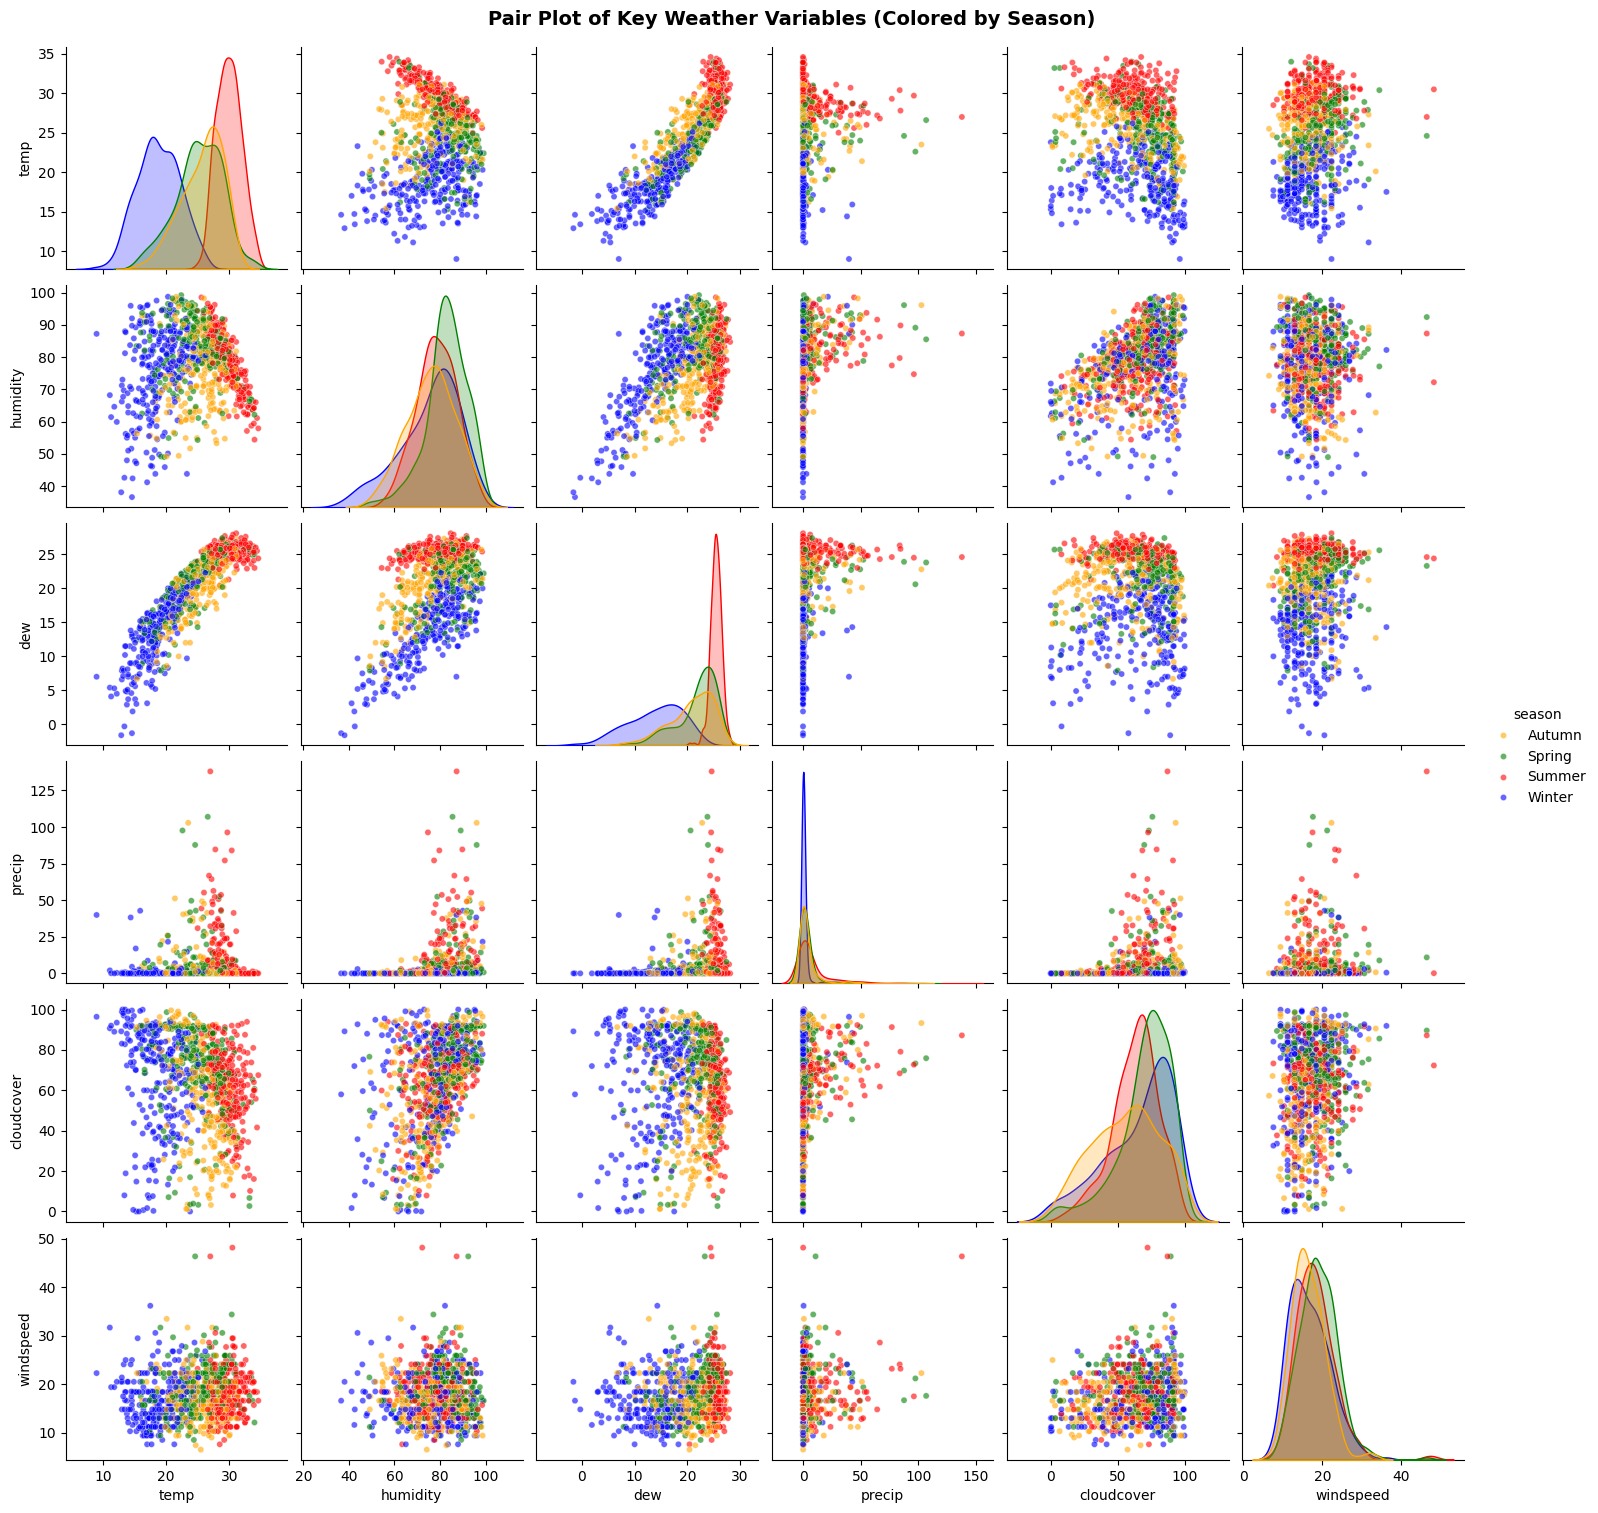

In [74]:
# Create pair plot for key variables
# Sample data for faster plotting (pairplot can be slow with large datasets)
sample_data = train_data.sample(n=min(1000, len(train_data)), random_state=42)

# Select key variables
key_vars = ['temp', 'humidity', 'dew', 'precip', 'cloudcover', 'windspeed']
sample_plot_data = sample_data[key_vars + ['season']].copy()

# Create the pair plot
pairplot = sns.pairplot(sample_plot_data, hue='season', 
                        palette={'Winter': 'blue', 'Spring': 'green', 
                                'Summer': 'red', 'Autumn': 'orange'},
                        diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20},
                        height=2.5)
pairplot.figure.suptitle('Pair Plot of Key Weather Variables (Colored by Season)', 
                      y=1.01, fontsize=14, fontweight='bold')
plt.show()

**Key Insights from Multivariate Analysis:**

**1. Seasonal Patterns:**
- **Temperature:** Shows clear seasonal variation with summer peaks (June-August) around 29-30°C and winter lows (December-February) around 17-18°C
- **Humidity:** Relatively stable year-round but slightly higher in summer months (80-85%)
- **Precipitation:** Highly seasonal with monsoon peak in July-August. Winter months (Dec-Feb) have minimal rainfall
- **Solar Radiation:** Peaks in summer (May-July) when days are longer and sun angle is higher

**2. Variable Relationships:**
- **Temperature-Humidity:** Negative relationship visible across seasons. Winter has lower temperatures with moderate humidity; summer shows high temperatures with varying humidity levels
- **Temperature-Dew Point:** Near-perfect linear relationship (r ≈ 0.95), confirming dew point rises proportionally with temperature
- **Cloud Cover-Solar Radiation:** Strong inverse relationship - more clouds significantly reduce solar radiation reaching the surface
- **Wind Speed-Wind Gust:** Strong positive correlation, with gusts typically 2-3x higher than average wind speed

**3. Weather Condition Patterns:**
- **"Partially Cloudy"** days span a wide temperature range (15-35°C), representing typical variable weather
- **"Rain, Overcast"** conditions show more moderate temperatures and higher humidity
- **"Clear"** days are associated with higher solar radiation and lower humidity
- Temperature distributions differ significantly between weather conditions, indicating conditions are good predictors

**4. Temporal Insights:**
- **Monsoon Season (May-September):** High precipitation, high humidity, warm temperatures, increased cloud cover
- **Dry Season (November-March):** Low precipitation, cooler temperatures, clearer skies, lower humidity
- **Transition Months (April, October):** Rapid changes in temperature and precipitation patterns
- Wind speed peaks slightly during monsoon months, possibly due to convective storm activity

**5. Modeling Implications:**
- Strong multicollinearity between `temp` and `dew`, `solarradiation` and `solarenergy` - may need to select one from each pair
- Seasonal patterns are very strong - time-based features (month, season) will be important predictors
- Precipitation is highly variable and weakly correlated with other features - may be difficult to predict
- Weather conditions could serve as useful categorical features for classification tasks
- The bimodal distributions in many variables (temp, cloudcover, pressure) reflect distinct seasonal regimes

These multivariate relationships provide crucial context for building predictive models and understanding the complex interactions in Hanoi's weather system.

#### Outlier Detection

Let's identify potential outliers in our numeric variables using box plots and statistical methods.

OUTLIER ANALYSIS (IQR Method)
        Variable  Count_Outliers  Percentage  Lower_Bound  Upper_Bound
            temp               2        0.07         8.90        40.90
        humidity              48        1.75        50.75       107.15
             dew              28        1.02         4.50        37.30
          precip             456       16.59        -3.29         5.48
       windspeed              37        1.35         4.00        30.40
        windgust              81        2.95         7.50        45.10
      cloudcover              42        1.53         4.50       126.90
  solarradiation               0        0.00       -96.80       400.20
      visibility              78        2.84         4.24        13.14
sealevelpressure               1        0.04       988.35      1033.55



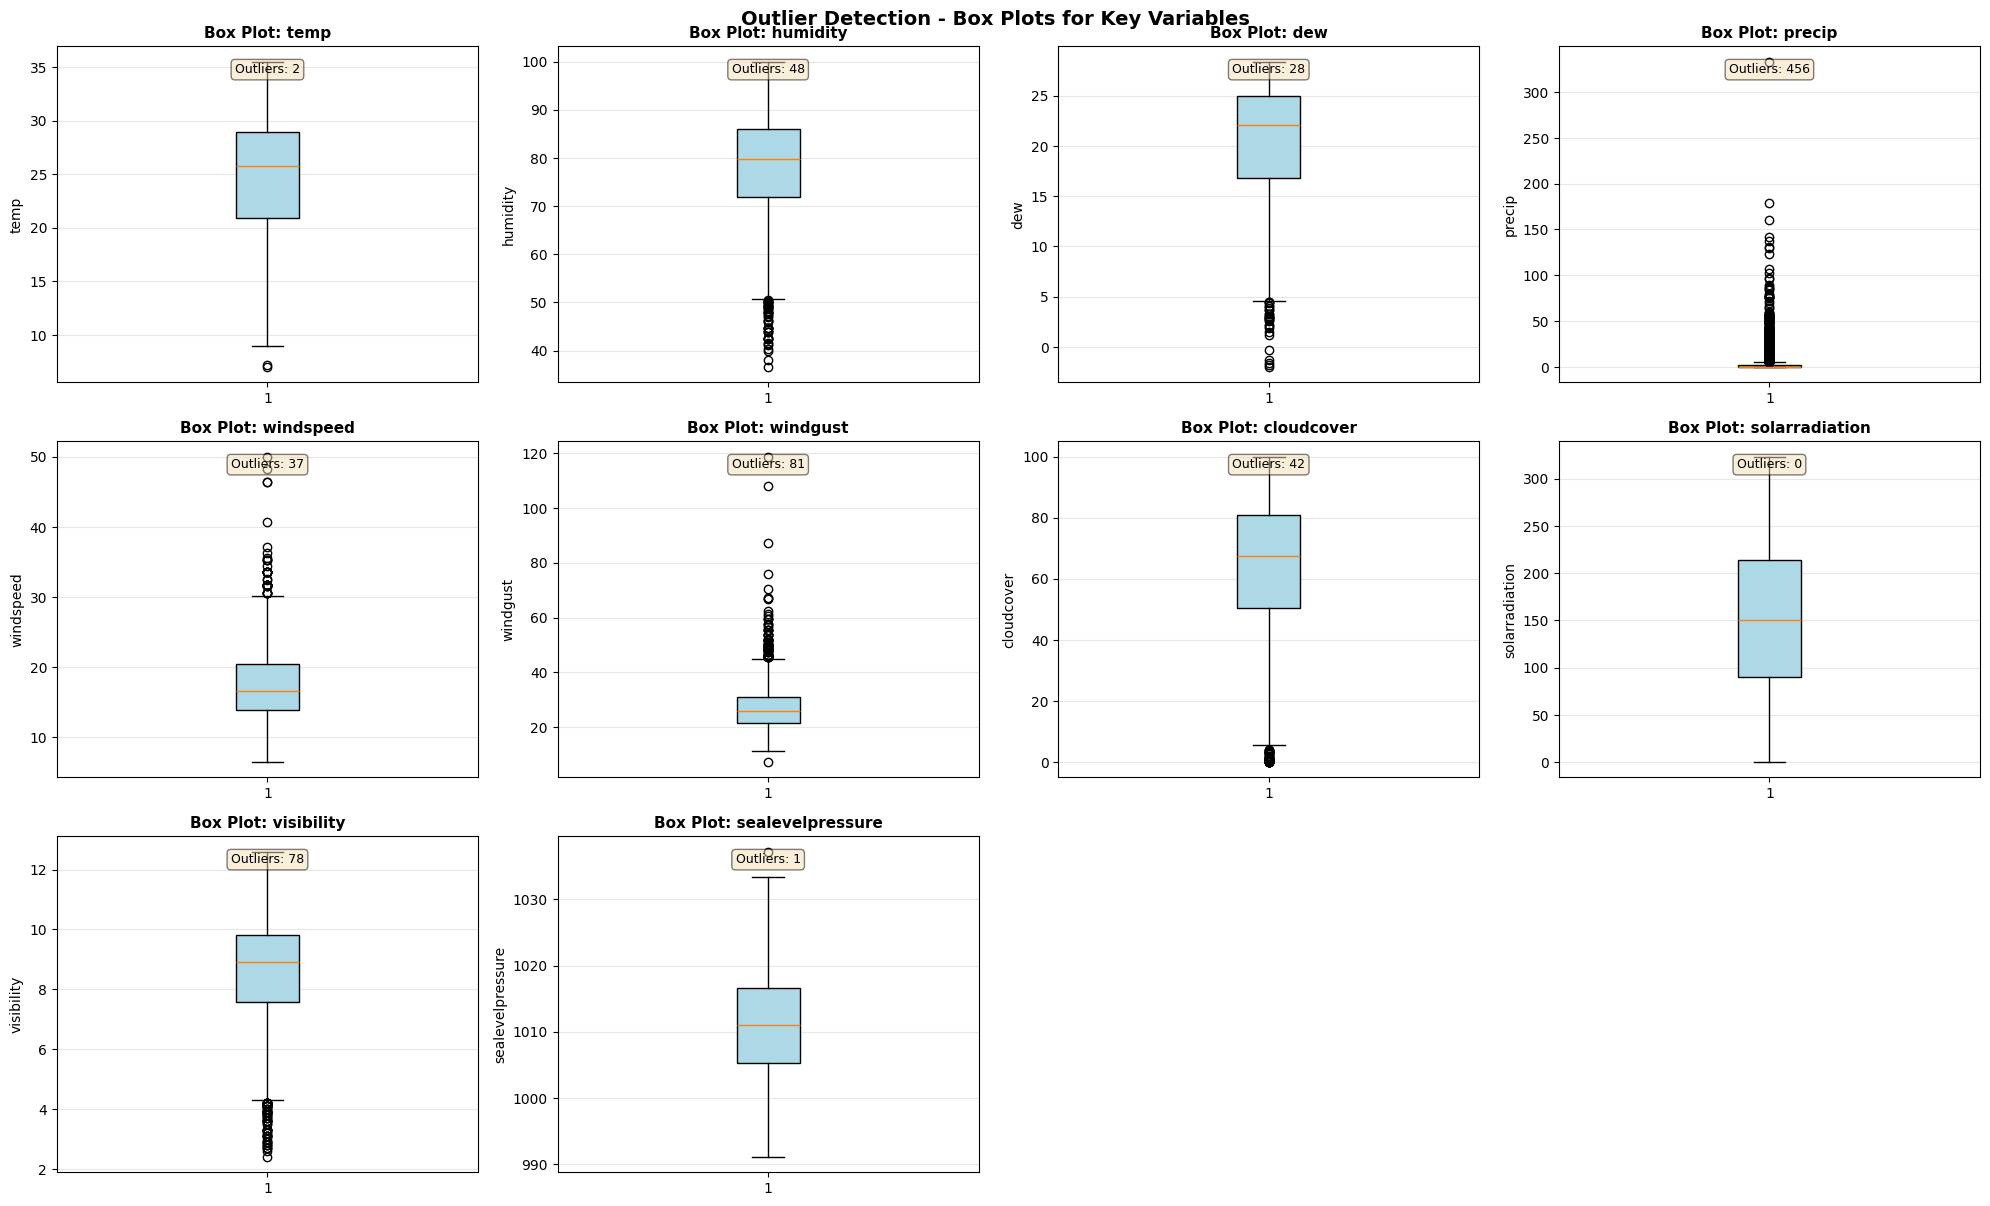

In [75]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Select key numeric columns for outlier analysis
outlier_cols = ['temp', 'humidity', 'dew', 'precip', 'windspeed', 'windgust', 
                'cloudcover', 'solarradiation', 'visibility', 'sealevelpressure']

# Calculate outliers
outlier_summary = []
for col in outlier_cols:
    n_outliers, lower, upper = detect_outliers_iqr(train_data, col)
    outlier_summary.append({
        'Variable': col,
        'Count_Outliers': n_outliers,
        'Percentage': round(n_outliers / len(train_data) * 100, 2),
        'Lower_Bound': round(lower, 2),
        'Upper_Bound': round(upper, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
print("="*80)
print("OUTLIER ANALYSIS (IQR Method)")
print("="*80)
print(outlier_df.to_string(index=False))
print("\n" + "="*80)

# Visualize outliers with box plots
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

for idx, col in enumerate(outlier_cols):
    if idx < len(axes):
        bp = axes[idx].boxplot(train_data[col].dropna(), vert=True, patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
        axes[idx].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3, axis='y')
        
        # Add outlier count annotation
        n_outliers = outlier_df[outlier_df['Variable'] == col]['Count_Outliers'].values[0]
        axes[idx].text(0.5, 0.95, f'Outliers: {n_outliers}', 
                      transform=axes[idx].transAxes, 
                      ha='center', va='top', fontsize=9,
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide unused subplots
for idx in range(len(outlier_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Outlier Detection - Box Plots for Key Variables', 
             fontsize=14, fontweight='bold', y=1.001)
plt.show()

**Outlier Analysis Interpretation:**

The outlier detection reveals several important patterns:

**1. Variables with High Outlier Rates:**
- **Precipitation (`precip`)**: Likely has the most outliers due to extreme rainfall events during storms. These are legitimate weather phenomena (heavy monsoon rains) and should be kept.
- **Wind Gust (`windgust`)**: High wind gusts during storms appear as outliers but represent real extreme weather events.
- **Solar Radiation**: Lower values during extended cloudy/rainy periods may appear as outliers.

**2. Variables with Few/No Outliers:**
- **Temperature, Humidity, Dew Point**: These tend to be stable with gradual changes, resulting in fewer outliers.
- **Sea Level Pressure**: Very stable variable with minimal outliers.

**3. Outlier Handling Recommendations:**
- **Keep most outliers**: For weather data, extreme values often represent real events (storms, heat waves) rather than measurement errors.
- **Investigate extreme outliers**: Values that are physically impossible (e.g., humidity > 100%, negative precipitation) should be checked.
- **Context matters**: What appears statistically as an outlier may be a critical data point for predicting extreme weather.

For weather forecasting, we generally want to **preserve outliers** as they represent important extreme weather patterns that models should learn to predict.

#### Data Quality Summary

Final validation check before moving to preprocessing and feature engineering.

In [76]:
# Comprehensive data quality check
print("="*80)
print("DATA QUALITY SUMMARY - TRAINING SET")
print("="*80)

# 1. Basic information
print(f"\n{'='*80}")
print("1. DATASET DIMENSIONS")
print(f"{'='*80}")
print(f"Total Records: {len(train_data):,}")
print(f"Total Features: {len(train_data.columns)}")
print(f"Date Range: {train_data.index.min()} to {train_data.index.max()}")
print(f"Time Span: {(train_data.index.max() - train_data.index.min()).days} days")

# 2. Duplicate records
print(f"\n{'='*80}")
print("2. DUPLICATE RECORDS")
print(f"{'='*80}")
n_duplicates = train_data.duplicated().sum()
print(f"Duplicate Rows: {n_duplicates} ({n_duplicates/len(train_data)*100:.2f}%)")

# 3. Missing values summary
print(f"\n{'='*80}")
print("3. MISSING VALUES SUMMARY")
print(f"{'='*80}")
total_missing = train_data.isnull().sum().sum()
total_cells = train_data.shape[0] * train_data.shape[1]
print(f"Total Missing Values: {total_missing:,} ({total_missing/total_cells*100:.2f}% of all cells)")
print(f"Features with Missing Data: {(train_data.isnull().sum() > 0).sum()}")
print(f"Features without Missing Data: {(train_data.isnull().sum() == 0).sum()}")

# 4. Data type distribution
print(f"\n{'='*80}")
print("4. DATA TYPE DISTRIBUTION")
print(f"{'='*80}")
dtype_counts = train_data.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"{dtype}: {count} features")

# 5. Value range validation
print(f"\n{'='*80}")
print("5. VALUE RANGE VALIDATION")
print(f"{'='*80}")

validation_checks = []

# Check humidity (should be 0-100)
humidity_invalid = ((train_data['humidity'] < 0) | (train_data['humidity'] > 100)).sum()
validation_checks.append(('Humidity', '0-100%', humidity_invalid, 'Valid' if humidity_invalid == 0 else 'WARNING'))

# Check cloud cover (should be 0-100)
cloudcover_invalid = ((train_data['cloudcover'] < 0) | (train_data['cloudcover'] > 100)).sum()
validation_checks.append(('Cloud Cover', '0-100%', cloudcover_invalid, 'Valid' if cloudcover_invalid == 0 else 'WARNING'))

# Check precipitation (should be >= 0)
precip_invalid = (train_data['precip'] < 0).sum()
validation_checks.append(('Precipitation', '>= 0 mm', precip_invalid, 'Valid' if precip_invalid == 0 else 'WARNING'))

# Check wind speed (should be >= 0)
windspeed_invalid = (train_data['windspeed'] < 0).sum()
validation_checks.append(('Wind Speed', '>= 0 km/h', windspeed_invalid, 'Valid' if windspeed_invalid == 0 else 'WARNING'))

# Check temperature (reasonable range for Hanoi: -5 to 50°C)
temp_invalid = ((train_data['temp'] < -5) | (train_data['temp'] > 50)).sum()
validation_checks.append(('Temperature', '-5 to 50°C', temp_invalid, 'Valid' if temp_invalid == 0 else 'WARNING'))

for check in validation_checks:
    status_symbol = '✓' if check[3] == 'Valid' else '⚠'
    print(f"{status_symbol} {check[0]}: Expected {check[1]} | Invalid: {check[2]} | Status: {check[3]}")

# 6. Data completeness by feature group
print(f"\n{'='*80}")
print("6. DATA COMPLETENESS BY FEATURE GROUP")
print(f"{'='*80}")

feature_groups = {
    'Temperature': ['temp', 'tempmax', 'tempmin', 'feelslike'],
    'Moisture': ['humidity', 'dew', 'precip', 'precipprob'],
    'Wind': ['windspeed', 'windgust', 'winddir'],
    'Atmosphere': ['sealevelpressure', 'cloudcover', 'visibility'],
    'Solar': ['solarradiation', 'solarenergy', 'uvindex']
}

for group, features in feature_groups.items():
    available_features = [f for f in features if f in train_data.columns]
    if available_features:
        completeness = train_data[available_features].notna().all(axis=1).sum()
        pct = completeness / len(train_data) * 100
        print(f"{group}: {completeness:,}/{len(train_data):,} records complete ({pct:.2f}%)")

# 7. Summary
print(f"\n{'='*80}")
print("7. OVERALL DATA QUALITY ASSESSMENT")
print(f"{'='*80}")
quality_score = 100 - (total_missing/total_cells*100)
print(f"Data Completeness Score: {quality_score:.2f}%")
print(f"Data Quality Status: {'EXCELLENT' if quality_score > 95 else 'GOOD' if quality_score > 90 else 'FAIR'}")
print(f"\n{'✓ Dataset is ready for preprocessing and feature engineering!' if quality_score > 90 else '⚠ Consider addressing data quality issues before proceeding.'}")
print(f"\n{'='*80}")

DATA QUALITY SUMMARY - TRAINING SET

1. DATASET DIMENSIONS
Total Records: 2,748
Total Features: 34
Date Range: 2015-01-01 00:00:00 to 2022-07-10 00:00:00
Time Span: 2747 days

2. DUPLICATE RECORDS
Duplicate Rows: 0 (0.00%)

3. MISSING VALUES SUMMARY
Total Missing Values: 3,293 (3.52% of all cells)
Features with Missing Data: 2
Features without Missing Data: 32

4. DATA TYPE DISTRIBUTION
float64: 20 features
object: 9 features
int64: 4 features
int32: 1 features

5. VALUE RANGE VALIDATION
✓ Humidity: Expected 0-100% | Invalid: 0 | Status: Valid
✓ Cloud Cover: Expected 0-100% | Invalid: 0 | Status: Valid
✓ Precipitation: Expected >= 0 mm | Invalid: 0 | Status: Valid
✓ Wind Speed: Expected >= 0 km/h | Invalid: 0 | Status: Valid
✓ Temperature: Expected -5 to 50°C | Invalid: 0 | Status: Valid

6. DATA COMPLETENESS BY FEATURE GROUP
Temperature: 2,748/2,748 records complete (100.00%)
Moisture: 2,748/2,748 records complete (100.00%)
Wind: 2,748/2,748 records complete (100.00%)
Atmosphere: 2,74


**Key Findings:**

Our comprehensive EDA has revealed the following about Hanoi's weather data:

**Data Quality:**
- High-quality dataset with minimal missing values (only in `preciptype` and `severerisk`)
- No duplicate records
- All values within valid physical ranges
- Complete data for core meteorological variables

**Climate Characteristics:**
- **Humid subtropical climate** with distinct seasonal patterns
- **Temperature:** Ranges from 7°C (winter) to 35.5°C (summer), with bimodal distribution
- **Humidity:** Consistently high (mean 78%), contributing to high feels-like temperatures
- **Precipitation:** Highly seasonal with monsoon peak (July-August) and dry winter
- **Cloud Cover:** Bimodal distribution reflecting clear/overcast weather patterns

**Key Relationships:**
- Strong correlation: Temperature ↔ Dew Point (r ≈ 0.95)
- Inverse relationship: Cloud Cover ↔ Solar Radiation (r ≈ -0.75)
- Seasonal dependency: Most weather variables show strong monthly patterns
- Precipitation is relatively independent of other variables

**Modeling Insights:**
- Time-based features (month, season) will be critical predictors
- Multicollinearity exists between some features (temp/dew, solarradiation/solarenergy)
- Extreme values (outliers) represent real weather events and should be preserved
- Categorical features (conditions, icon) provide valuable classification information


## Data Preprocessing and Feature Engineering

Our preprocessing pipeline consists of the following steps:

 1. **Data Loading and Splitting**
- Load daily weather data from CSV and convert datetime to index
- Split data into:
  - **Training set (70%)**: Used to fit encoders and scalers
  - **Development set (15%)**: Used for validation and hyperparameter tuning
  - **Test set (15%)**: Final evaluation set

 2. **Remove Data Leakage Columns**
- Drop columns that would cause data leakage: `tempmax`, `tempmin`, `name`, `stations`, `source`, `season`
- Keep descriptive columns for creating lagged features

 3. **Transform Sunrise/Sunset into Day Length**
- Parse `sunrise` and `sunset` time strings (HH:MM:SS format)
- Calculate `day_length_h` as the difference in hours
- Drop original sunrise/sunset columns

 4. **Create Comprehensive Temporal Features**
- **Date components**: year, quarter, month, day_of_year, day_of_week, week_of_year, is_weekend
- **Cyclical encodings** (smooth seasonal patterns):
  - `month_sin`, `month_cos` (captures 12-month cycle)
  - `day_sin`, `day_cos` (captures 365-day cycle)
  - `week_sin`, `week_cos` (captures 52-week cycle)
- **Season indicators**: winter, spring, summer, autumn, hot/cool/moderate months
- **Monsoon patterns** (specific to Hanoi):
  - `is_monsoon_peak` (July-August - high rainfall)
  - `is_monsoon_season` (May-September)
  - `is_dry_season` (November-March)
- **Solar dynamics**:
  - `days_since_winter_solstice` & `days_since_summer_solstice`
  - `days_to_monsoon_peak` (circular distance)
  - `solar_angle_proxy` (based on day of year)
- **Rainfall patterns** from EDA: high_rainfall_month (June-September), low_rainfall_month (November-March)

 5. **Engineer Description Features**
- Extract binary indicators from weather description text:
  - `has_chance_of_rain`, `is_morning_event`, `is_afternoon_event`, `is_clearing_later`
- Drop original description column

 6. **Encode Categorical Variables**
- One-hot encode: `preciptype`, `conditions`, `icon` using training set categories
- Handle unseen values gracefully with `handle_unknown='ignore'`
- Fit encoder on training data to ensure consistency

 7. **Create Lag Features**
- Capture previous days' conditions:
  - `temp`: lags 1, 2, 3, 7 days
  - `feelslike`: lags 1, 3 days
  - `humidity`: lag 1 day
  - `sealevelpressure`: lag 3 days
  - `windspeed`: lags 1, 2 days
- Create lagged versions of categorical features (1, 3 day lags)
- Drop non-lagged categorical columns to prevent leakage

 8. **Create Rolling Window Features**
- `precip_roll_mean_7`: 7-day rolling mean of precipitation (shifted 1 day)
- `humidity_roll_mean_7`: 7-day rolling mean of humidity
- `windspeed_roll_max_3`: 3-day rolling maximum of wind speed

 9. **Create Interaction Features**
- **Heat index**: `feelslikemax × humidity`
- **Wind chill effect**: `feelslikemin × windspeed`
- **Wind intensity**: `windspeed²` (non-linear effect)
- **Atmospheric moisture**: `sealevelpressure × humidity`
- **Solar exposure**: `day_length_h × uvindex` (if available)

 10. **Create Multi-Day Target**
- Create target variable: `target_temp_5d` = temperature 5 days ahead
- This allows the model to predict temperature 5 days in the future

 11. **Handle Missing Values**
- Drop columns entirely empty (all NaN)
- Drop rows with NaN in critical columns (lags, rolling features, target)

 12. **Feature Selection**
- Use ensemble of selection methods:
  - **Pearson correlation** with target
  - **Mutual Information** regression score
  - **LassoCV** coefficient magnitudes
  - **Random Forest** feature importance
- Aggregate rankings and select top 30 features with lowest average rank

 13. **Data Preprocessing Pipeline**
For numerical features:
1. **Imputation**: Replace missing values with median
2. **Outlier clipping**: Use IQR method (1.5 × IQR) to clip extreme values
3. **Scaling**: StandardScaler normalization (zero mean, unit variance)

 14. **Save Processed Data**
- Save transformed data: `X_train_transformed`, `X_dev_transformed`, `X_test_transformed`
- Save targets: `y_train`, `y_dev`, `y_test`
- Save feature-engineered data: `train_features`, `dev_features`, `test_features`

In [ ]:
# run this script to execute preprocessing steps
# %run preprocessing.py